# Supervised Machine Learning Models - Classification - Spaceship Titanic Predictions

In [57]:
# project details: # https://www.kaggle.com/competitions/spaceship-titanic/overview

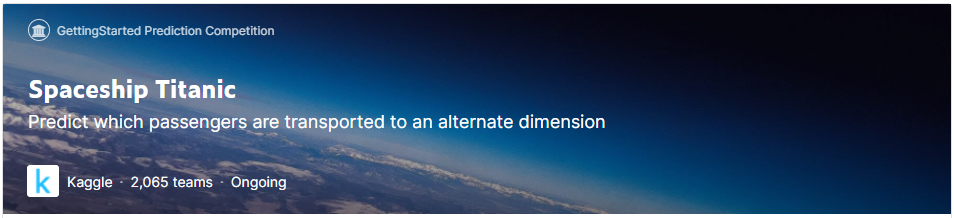

In [58]:
# Load the spaceship pic

import os
from IPython.display import Image
PATH = "C:\\Users\\pitsi\\Desktop\\Python Tutorials\\2022 Python Tutorial\\3. Classification Model\\"
Image(filename = PATH + "Spaceship Tit pic.png", width=900, height=900)

## Table of Contents:

Video 1:
1. What is ML in a nutshell
2. What is the ML Process we will follow
3. Loading & Investigating the raw data
4. Data Cleaning
5. Visualizing the Data
6. Missing Values
7. Investigating distributions
8. Scalling the data & Turning categorical values to Numeric Representation
9. Selecting the important features
10. Training & Running the classification model
    
Video 2    
1. Model Optimization
2. Trying a new way of replacing missing values
3. Trying with less variables - Avoid overfit
4. Trying the Recursive Feature Elimination Process
5. Running our Final Model
6. Saving the combine results in a single CSV File - For Power BI Dashboard
    
Video 3:
 - Power BI Dashboard

## 1. What is Machine Learning (ML) in a nutshell
- “Machine learning is the science (and art) of programming computers so they can learn from data” by Aurélien Géron book (Hands-On Machine Learning with Scikit-Learn and TensorFlow)
- ML uses statistical models and algorithms to perform tasks like predictions & classifications without explicit instructions
- ML is a subset of Artificial Intelligence

## 2. The Machine Learning Process

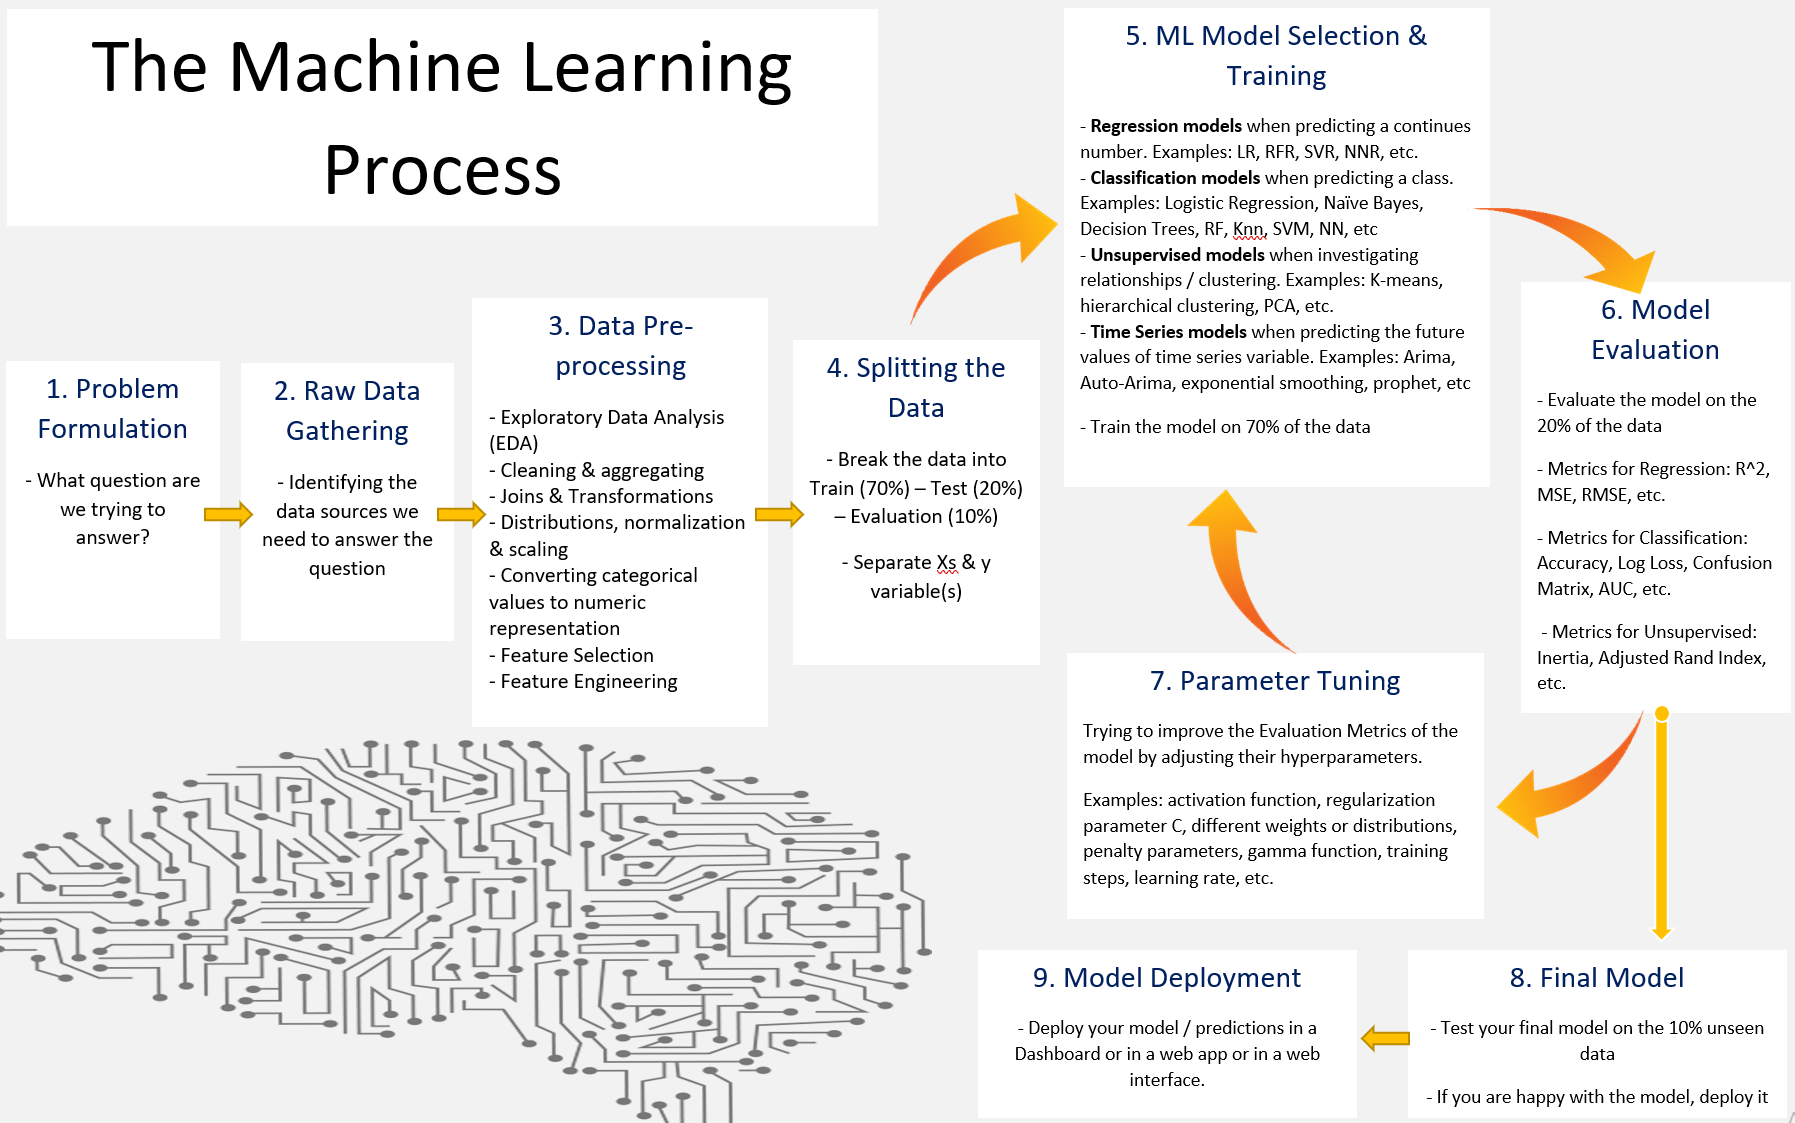

In [59]:
PATH = "C:\\Users\\pitsi\Desktop\\Python tutorials\\2022 Python Tutorial\\2. Linear Regression\\"
Image(filename = PATH + "ML Process.png", width=900, height=900)

In [60]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

## 3. Loading & Investigating the raw data

In [61]:
# loading the raw data

raw_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//train.csv")
evaluation_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//test.csv")
submission_example = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//sample_submission.csv")

print('raw_data', raw_data.shape)
print('evaluation_data', evaluation_data.shape)
print('submission_example', submission_example.shape)

raw_data (8693, 14)
evaluation_data (4277, 13)
submission_example (4277, 2)


In [62]:
raw_data.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [63]:
# Checking for null values

raw_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [64]:
# Vizualizing the dtypes
raw_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [65]:
# chaning the types so we can visualize

strings = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Name', 'Transported']
numeric = [ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for s in strings:
    raw_data[s] = raw_data[s].astype(str)
    
for n in numeric:
    #raw_data[n][raw_data[n] == 'Unknown'] = 0
    raw_data[n] = raw_data[n].astype(float)

In [66]:
raw_data.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

  Transported  
0       False  
1        True  
2       False  
3       False  
4        True

In [67]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    try:
        unique_vals = np.unique(raw_data[column])
    except:
        unique_vals = raw_data[column].unique()
        
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature PassengerId :8693
The number of values for feature HomePlanet :4 -- ['Earth' 'Europa' 'Mars' 'nan']
The number of values for feature CryoSleep :3 -- ['False' 'True' 'nan']
The number of values for feature Cabin :6561
The number of values for feature Destination :4 -- ['55 Cancri e' 'PSO J318.5-22' 'TRAPPIST-1e' 'nan']
The number of values for feature Age :81
The number of values for feature VIP :3 -- ['False' 'True' 'nan']
The number of values for feature RoomService :1274
The number of values for feature FoodCourt :1508
The number of values for feature ShoppingMall :1116
The number of values for feature Spa :1328
The number of values for feature VRDeck :1307
The number of values for feature Name :8474
The number of values for feature Transported :2 -- ['False' 'True']


## 4. Data Cleaning

In [68]:
raw_data['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', 'F/1/S', 'F/0/P', 'F/2/S', 'G/0/S',
       'F/3/S', 'B/1/P', 'F/1/P', 'G/1/S', 'F/2/P', 'nan', 'F/3/P',
       'F/4/P', 'F/5/P', 'G/0/P', 'F/6/P', 'E/0/S', 'D/0/P', 'C/2/S',
       'F/6/S', 'C/0/P', 'F/8/P', 'G/4/S', 'F/9/P', 'D/1/S', 'D/1/P',
       'F/8/S', 'F/10/S', 'G/1/P', 'G/2/P', 'B/3/P', 'G/3/P', 'F/10/P',
       'E/1/S', 'E/2/S', 'G/6/S', 'F/11/S', 'A/1/S', 'G/7/S', 'F/12/S',
       'F/13/S', 'F/14/S', 'E/3/S', 'G/6/P', 'G/10/S', 'F/15/S', 'E/4/S',
       'F/16/S', 'F/13/P', 'F/14/P', 'F/17/S', 'D/3/P', 'C/3/S', 'F/18/S',
       'F/15/P', 'C/4/S', 'G/13/S', 'F/16/P', 'G/14/S', 'C/5/S', 'F/17/P',
       'E/5/S', 'G/15/S', 'G/16/S', 'F/20/S', 'G/9/P', 'A/2/S', 'G/11/P',
       'F/19/P', 'G/12/P', 'F/23/S', 'F/24/S', 'G/18/S', 'F/21/P',
       'D/2/S', 'G/19/S', 'B/5/P', 'E/6/S', 'B/1/S', 'F/23/P', 'G/20/S',
       'F/24/P', 'D/4/P', 'A/0/P', 'F/25/P', 'G/21/S', 'F/27/P', 'F/27/S',
       'E/7/S', 'D/3/S', 'E/8/S', 'G/22/S', 'F/29/S', 'D/5/S', 'G

In [69]:
# investigating Cabin
import sys
np.set_printoptions(threshold=sys.maxsize)
pd.set_option("display.max_rows", None)

raw_data['Cabin'].unique()
raw_data['Cabin'].value_counts()

nan         199
G/734/S       8
F/1194/P      7
G/1476/S      7
E/13/S        7
C/137/S       7
B/11/S        7
G/1368/P      7
B/82/S        7
D/176/S       7
B/201/P       7
F/1411/P      7
G/109/P       7
C/21/P        7
G/981/S       7
E/82/P        6
G/377/P       6
G/765/S       6
F/859/P       6
G/292/S       6
G/117/S       6
B/19/S        6
D/56/P        6
G/230/S       6
G/943/S       6
G/1448/S      6
B/183/S       6
C/255/S       6
F/856/P       6
C/306/S       6
G/330/P       6
E/0/S         6
G/383/S       6
F/1808/P      6
C/82/P        6
C/42/P        6
C/225/P       6
G/186/S       6
G/974/P       6
A/67/P        6
C/230/S       6
C/125/S       6
C/319/S       6
G/657/P       6
G/1046/S      6
G/150/S       6
G/1460/S      6
G/1108/P      6
G/732/S       5
G/505/S       5
C/25/S        5
G/636/P       5
G/757/P       5
G/37/P        5
G/1313/S      5
C/176/S       5
C/95/S        5
C/18/P        5
D/288/P       5
G/1267/P      5
G/178/S       5
B/86/P        5
B/62/S  

In [70]:
# cleaning the Cabin

# creating a copy file
raw_data_clean = raw_data.copy()

# adding 3 more columns
raw_data_clean[['Deck', 'Num', 'Side']] = raw_data_clean['Cabin'].str.split('/', expand=True) 

del raw_data_clean['Cabin']

raw_data_clean.head()

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck               Name Transported  \
0        0.0           0.0     0.0     0.0    Maham Ofracculy       False   
1        9.0          25.0   549.0    44.0       Juanna Vines        True   
2     3576.0           0.0  6715.0    49.0      Altark Susent       False   
3     1283.0         371.0  3329.0   193.0       Solam Susent       False   
4       70.0         151.0   565.0     2.0  Willy Santantines        True   

  Deck Num Side  
0    B   0    P  
1    F   0    S  
2    A   0    S  
3    A   0    S  
4    F   1    S

In [71]:
# investigating the new features
#raw_data_clean['Age'].value_counts()
#raw_data_clean[['Age']].sort_values(by = 'Age').drop_duplicates()

## 5. Visualizing the Data

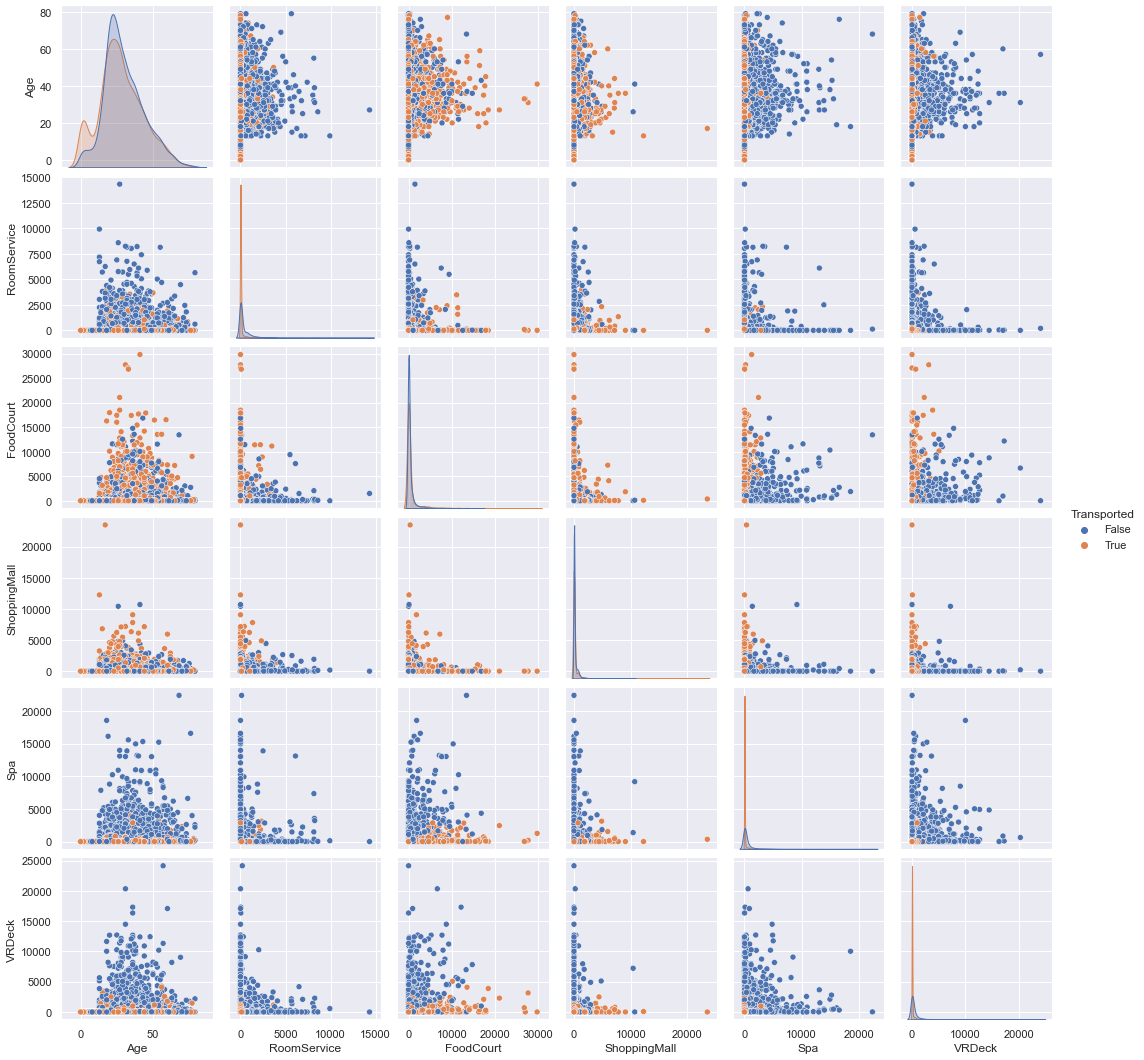

In [72]:
# Example 1 - Visualize the data using seaborn Pairplots

g = sns.pairplot(raw_data_clean[[ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Transported']], hue = 'Transported')#, height = 5, kind="reg")

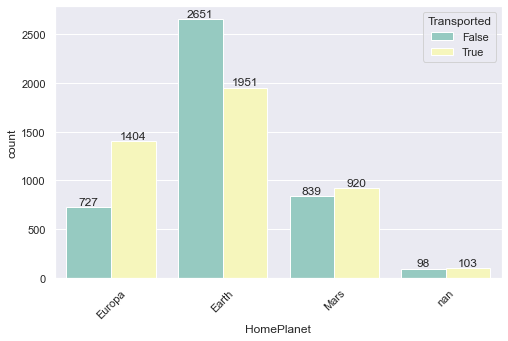

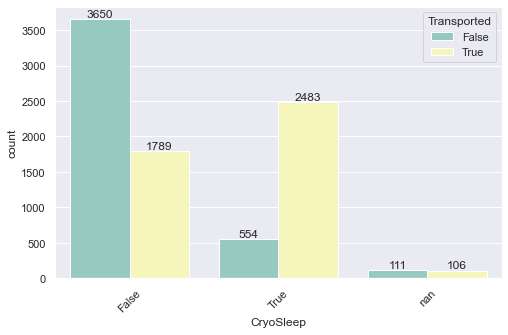

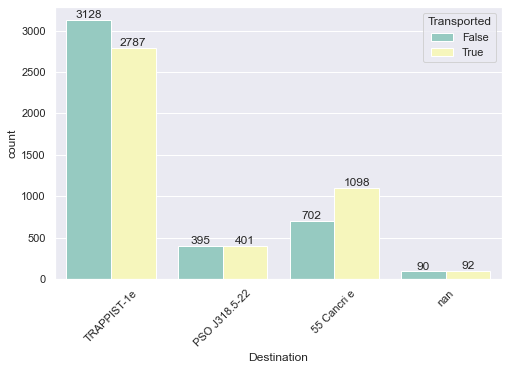

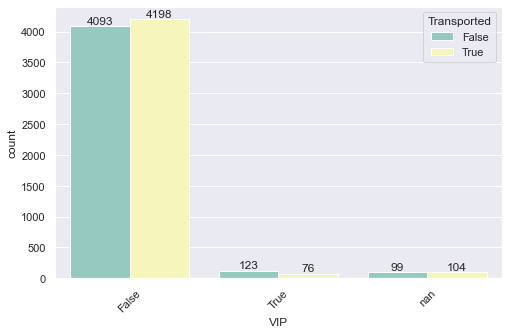

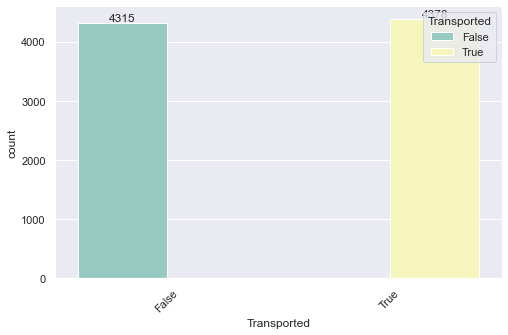

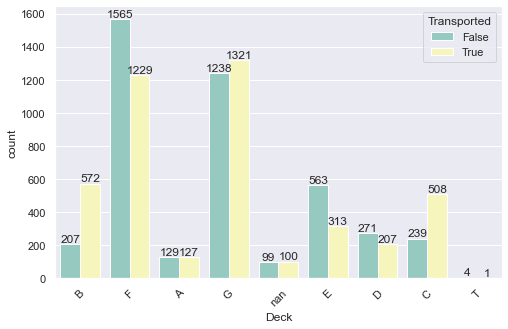

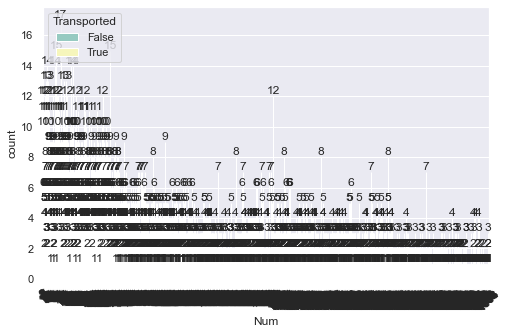

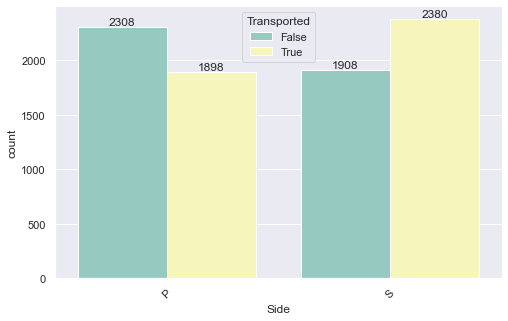

In [73]:
# Example 6 - Total price by carbody for multible categories

categories = ['HomePlanet', 'CryoSleep', 'Destination','VIP', 'Transported', 'Deck','Num','Side']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for f in categories:
    ax = sns.countplot(x = f, data = raw_data_clean, palette = 'Set3', hue = 'Transported')
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=45)
    plt.show()

In [74]:
raw_data_clean['Num'].unique()

array(['0', '1', '2', '3', None, '4', '5', '6', '8', '9', '10', '11', '7',
       '12', '13', '14', '15', '16', '17', '18', '20', '19', '23', '24',
       '21', '25', '27', '22', '29', '30', '31', '26', '32', '28', '37',
       '35', '38', '36', '41', '42', '33', '34', '44', '45', '46', '40',
       '47', '48', '43', '50', '52', '53', '54', '49', '56', '51', '59',
       '61', '63', '64', '65', '55', '67', '60', '68', '72', '73', '62',
       '74', '57', '76', '78', '66', '82', '83', '84', '85', '69', '89',
       '90', '71', '91', '92', '96', '75', '97', '77', '79', '98', '99',
       '80', '81', '100', '101', '86', '87', '103', '70', '88', '109',
       '93', '110', '95', '111', '102', '114', '115', '116', '105', '117',
       '107', '108', '118', '120', '121', '39', '123', '124', '125',
       '126', '94', '128', '129', '131', '133', '112', '113', '135',
       '136', '137', '138', '140', '141', '142', '143', '104', '144',
       '145', '146', '122', '147', '127', '149', '150', '132

In [75]:
raw_data_clean[raw_data_clean['Num'].isna()]

PassengerId HomePlanet CryoSleep    Destination   Age    VIP  \
15       0012_01      Earth     False    TRAPPIST-1e  31.0  False   
93       0101_01       Mars      True    TRAPPIST-1e  31.0  False   
103      0110_01     Europa     False    TRAPPIST-1e  32.0  False   
222      0239_01       Mars     False    TRAPPIST-1e  37.0  False   
227      0244_01       Mars      True    TRAPPIST-1e  43.0  False   
251      0278_01      Earth     False    TRAPPIST-1e  35.0  False   
260      0287_01     Europa      True    55 Cancri e  39.0  False   
272      0301_01      Earth      True    TRAPPIST-1e  16.0  False   
280      0310_01     Europa     False    TRAPPIST-1e  67.0  False   
295      0327_01      Earth     False    TRAPPIST-1e  19.0  False   
314      0348_02       Mars       nan    TRAPPIST-1e  36.0  False   
317      0355_01      Earth      True    TRAPPIST-1e  18.0  False   
344      0380_01     Europa      True    55 Cancri e  26.0  False   
415      0453_02     Europa      True    55 Cancri e  34.0  False   
436      0468_01      Earth      True    TRAPPIST-1e  34.0  False   
456      0498_01     Europa      True    55 Cancri e  27.0  False   
462      0502_01       Mars     False    TRAPPIST-1e  22.0  False   
487      0525_01      Earth      True    TRAPPIST-1e  47.0  False   
665      0693_01     Europa      True    55 Cancri e  35.0  False   
679      0709_03     Europa      True    55 Cancri e  23.0  False   
691      0715_01     Europa       nan    55 Cancri e  54.0  False   
699      0732_01      Earth     False    TRAPPIST-1e  19.0  False   
713      0753_03     Europa      True    55 Cancri e  42.0  False   
785      0823_02      Earth     False    55 Cancri e  42.0  False   
788      0826_01      Earth     False    TRAPPIST-1e  27.0  False   
793      0833_01     Europa      True    55 Cancri e  36.0  False   
826      0879_01      Earth     False    TRAPPIST-1e  46.0  False   
870      0932_01       Mars      True    TRAPPIST-1e  29.0  False   
928      0992_04     Europa     False    55 Cancri e  35.0   True   
946      1006_03      Earth     False    TRAPPIST-1e  12.0  False   
949      1011_01      Earth     False    TRAPPIST-1e  31.0  False   
959      1022_01      Earth     False    TRAPPIST-1e  15.0    nan   
980      1041_01     Europa      True    TRAPPIST-1e  46.0  False   
1029     1095_01     Europa      True    TRAPPIST-1e  34.0  False   
1049     1116_02      Earth       nan    TRAPPIST-1e  36.0  False   
1058     1132_01      Earth      True    TRAPPIST-1e  22.0  False   
1060     1134_01     Europa      True    55 Cancri e  13.0  False   
1075     1148_04     Europa     False    55 Cancri e  39.0  False   
1134     1198_01       Mars     False    TRAPPIST-1e  28.0    nan   
1160     1228_01       Mars      True    TRAPPIST-1e  21.0  False   
1219     1295_01      Earth       nan    TRAPPIST-1e  19.0  False   
1232     1308_01     Europa      True    55 Cancri e  40.0  False   
1327     1404_02     Europa     False    TRAPPIST-1e  42.0  False   
1362     1434_02      Earth     False    TRAPPIST-1e   0.0  False   
1379     1452_02     Europa      True    TRAPPIST-1e  70.0  False   
1462     1545_01       Mars     False    TRAPPIST-1e  20.0  False   
1467     1550_02     Europa     False    55 Cancri e  53.0   True   
1478     1568_01      Earth     False    TRAPPIST-1e  22.0  False   
1491     1581_02       Mars      True    TRAPPIST-1e  28.0  False   
1519     1613_01      Earth     False    55 Cancri e  16.0  False   
1550     1645_01        nan      True    55 Cancri e  18.0  False   
1559     1655_01      Earth     False    TRAPPIST-1e  28.0  False   
1587     1685_01      Earth     False    55 Cancri e  51.0  False   
1592     1688_02      Earth      True    TRAPPIST-1e   7.0  False   
1610     1709_03       Mars     False    TRAPPIST-1e  35.0  False   
1624     1718_01      Earth      True    TRAPPIST-1e  20.0  False   
1680     1782_01      Earth      True    TRAPPIST-1e  28.0  False   
171

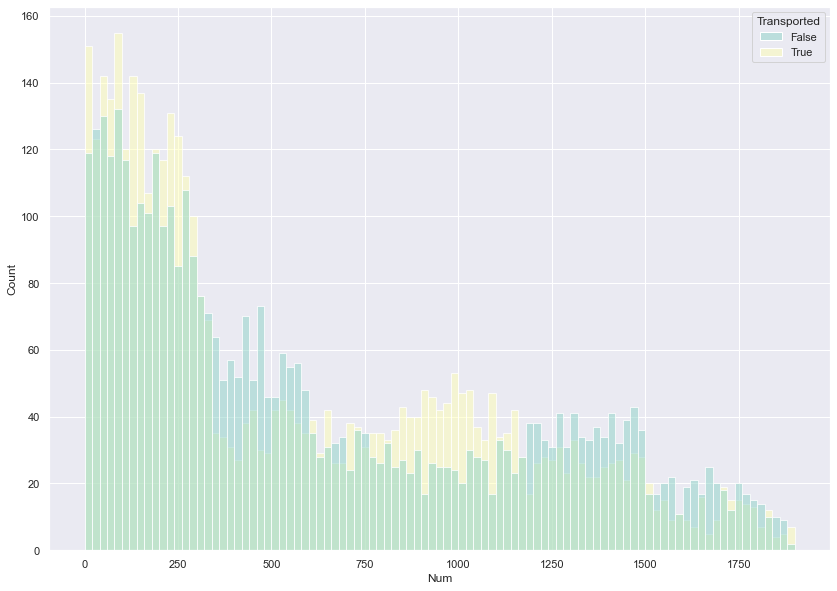

In [76]:
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(14,10)})

num_test_raw = raw_data_clean.copy()

num_test_raw = num_test_raw[~num_test_raw['Num'].isna()]
num_test_raw['Num'] = num_test_raw['Num'].astype(int)

ax = sns.histplot(x = 'Num', data = num_test_raw, palette = 'Set3', hue = 'Transported', binwidth=20)


In [77]:
# checking the table

num_test_raw[['Num', 'Transported', 'PassengerId']].groupby(['Num', 'Transported'], as_index = False).agg({'PassengerId':'count'})

Num Transported  PassengerId
0        0       False           12
1        0        True            6
2        1       False            5
3        1        True           10
4        2       False            6
5        2        True            5
6        3       False            5
7        3        True           11
8        4       False            5
9        4        True            2
10       5       False            6
11       5        True            7
12       6       False            8
13       6        True            4
14       7       False            3
15       7        True            6
16       8       False            7
17       8        True            6
18       9       False            4
19       9        True           12
20      10       False            6
21      10        True            6
22      11       False            5
23      11        True           11
24      12       False            2
25      12        True            3
26      13       False           13
27      13        True            3
28      14       False            5
29      14        True           11
30      15       False            3
31      15        True            7
32      16       False            3
33      16        True           14
34      17       False            6
35      17        True            2
36      18       False            6
37      18        True           12
38      19       False            9
39      19        True           13
40      20       False            9
41      20        True            6
42      21       False            7
43      21        True            9
44      22       False           11
45      22        True            4
46      23       False           10
47      23        True            6
48      24       False            7
49      24        True            9
50      25       False            6
51      25        True            9
52      26       False            1
53      26        True            9
54      27       False            9
55      27        True            8
56      28       False            5
57      28        True            6
58      29       False            8
59      29        True            4
60      30       False            5
61      30        True            5
62      31       False            5
63      31        True            4
64      32       False            7
65      32        True            6
66      33       False            4
67      33        True            2
68      34       False            3
69      34        True            1
70      35       False            9
71      35        True            8
72      36       False            3
73      36        True            6
74      37       False            7
75      37        True            7
76      38       False            6
77      38        True            8
78      39       False            4
79      39        True            6
80      40       False            3
81      40        True            2
82      41       False            4
83      41        True            7
84      42       False            8
85      42        True            9
86      43       False            7
87      43        True            8
88      44       False           12
89      44        True            5
90      45       False            5
91      45        True            4
92      46       False            5
93      46        True            9
94      47       False            6
95      47        True            8
96      48       False            6
97      48        True            6
98      49       False            4
99      49        True            7
100     50       False            3
101     50        True           14
102     51       False           11
103     51        True            1
104     52       False            4
105     52        True            4
106     53       False           10
107     53        True            7
108     54       False            8
109     54        True            5
110     55 

In [78]:
raw_data_clean.head()

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck               Name Transported  \
0        0.0           0.0     0.0     0.0    Maham Ofracculy       False   
1        9.0          25.0   549.0    44.0       Juanna Vines        True   
2     3576.0           0.0  6715.0    49.0      Altark Susent       False   
3     1283.0         371.0  3329.0   193.0       Solam Susent       False   
4       70.0         151.0   565.0     2.0  Willy Santantines        True   

  Deck Num Side  
0    B   0    P  
1    F   0    S  
2    A   0    S  
3    A   0    S  
4    F   1    S

In [79]:
# creating a new field for cabin number based on findings

raw_data_clean['Num'][raw_data_clean['Num'].isna()] = 99999
raw_data_clean['Num'] = raw_data_clean['Num'].astype(int)

raw_data_clean['Cabin_Category'] = 'Uknown'
raw_data_clean['Cabin_Category'][raw_data_clean['Num'] <= 300 ] = 'Cabin Category A'
raw_data_clean['Cabin_Category'][raw_data_clean['Num'] > 300 ] = 'Cabin Category B'
raw_data_clean['Cabin_Category'][raw_data_clean['Num'] > 600 ] = 'Cabin Category C'
raw_data_clean['Cabin_Category'][raw_data_clean['Num'] > 900 ] = 'Cabin Category D'
raw_data_clean['Cabin_Category'][raw_data_clean['Num'] > 1200 ] = 'Cabin Category E'
raw_data_clean['Cabin_Category'][raw_data_clean['Num'] > 1500 ] = 'Cabin Category F'
raw_data_clean['Cabin_Category'][raw_data_clean['Num'] > 1800 ] = 'Cabin Category G'

# putting the np.nan back
raw_data_clean['Num'][raw_data_clean['Num'] == 99999] = np.nan

raw_data_clean['Cabin_Category'].value_counts()

Cabin Category A    3569
Cabin Category B    1484
Cabin Category D     991
Cabin Category C     976
Cabin Category E     937
Cabin Category F     459
Cabin Category G     277
Name: Cabin_Category, dtype: int64

## 6. Missing Values

Since we have a lot of missing values for each variable (not the same row), we will try to fill in the missing values and not drop them. One of the most common techniques is to replace the continues values with the median and the categorical features with the mode

In [80]:
# changing missing values to mode and median

strings2 = ['HomePlanet', 'CryoSleep', 'Destination','VIP','Transported', 'Deck', 'Cabin_Category', 'Side']
numeric2 = [ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']

for s in strings2:
    mode = raw_data_clean[s].mode()[0]
    raw_data_clean[s]= raw_data_clean[s].fillna(mode)
    raw_data_clean[s][raw_data_clean[s] == 'nan'] = mode
    
for n in numeric2:
    median = raw_data_clean[n].median()
    raw_data_clean[n]= raw_data_clean[n].fillna(median)

In [81]:
# checking for nulls
raw_data_clean.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
Deck              0
Num               0
Side              0
Cabin_Category    0
dtype: int64

## 7. Investigating distributions

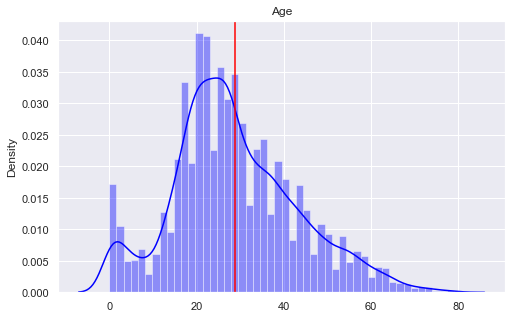

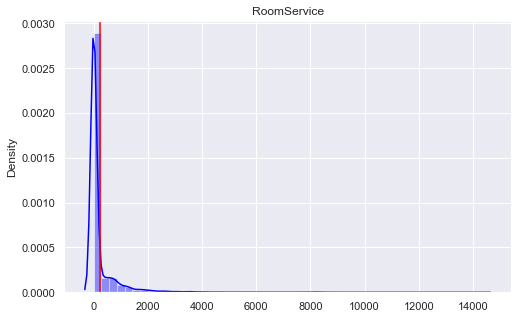

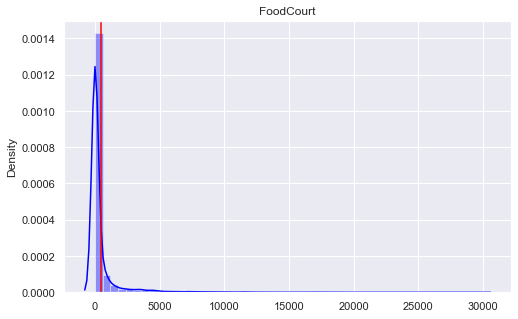

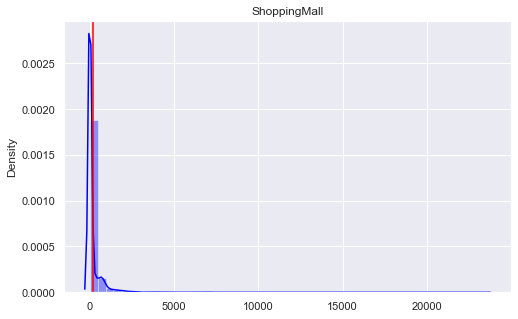

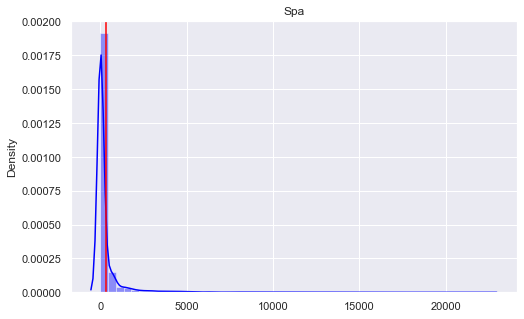

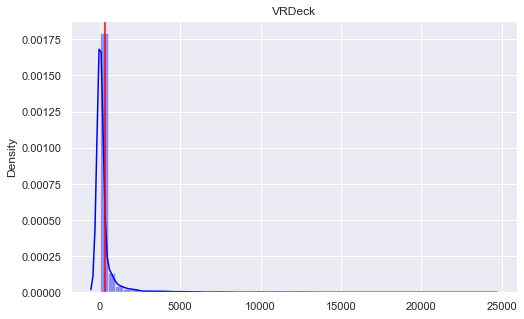

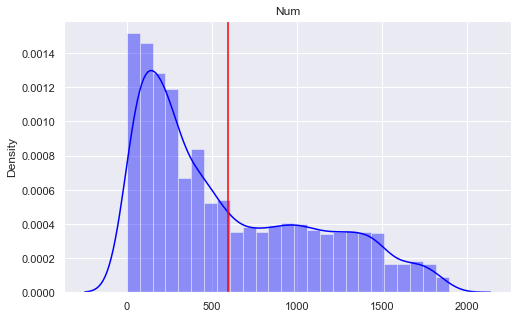

In [82]:
# Example 8 - Investigating the distribution 
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})


for n in numeric2:
    x = raw_data_clean[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = raw_data_clean[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

Age
The meadian is:  27.0


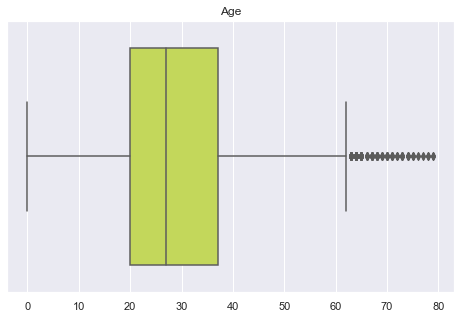

RoomService
The meadian is:  0.0


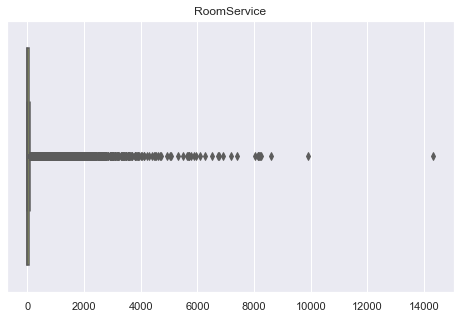

FoodCourt
The meadian is:  0.0


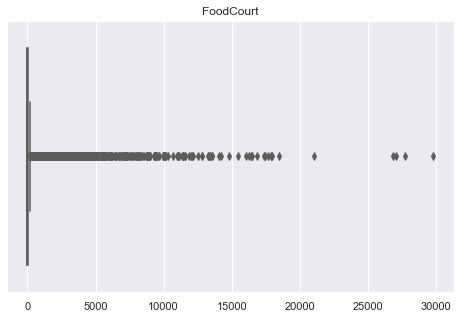

ShoppingMall
The meadian is:  0.0


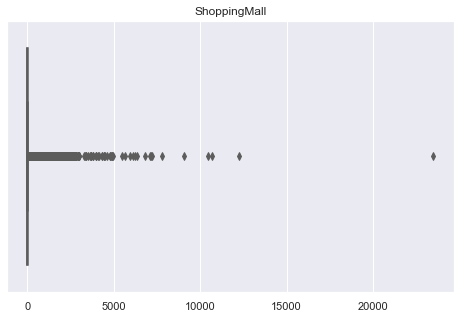

Spa
The meadian is:  0.0


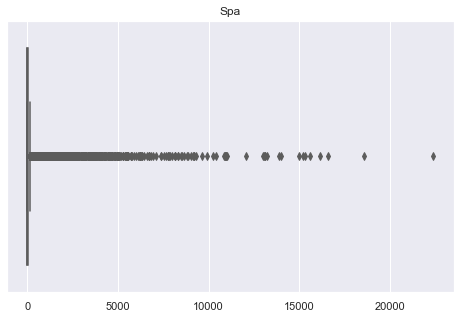

VRDeck
The meadian is:  0.0


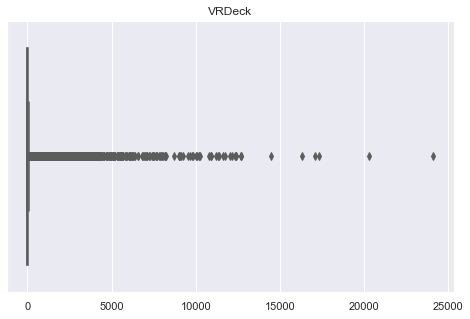

Num
The meadian is:  427.0


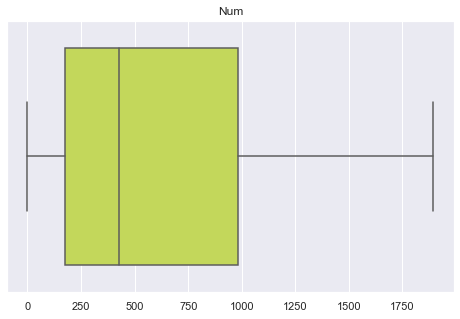

In [83]:
# Example 11 - Investigating the outliers

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in numeric2:
    print(c)
    x = raw_data_clean[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', raw_data_clean[c].median())
    plt.title(c)
    plt.show()

In [84]:
raw_data_clean[raw_data_clean['FoodCourt'] > 20000]

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
1213     1292_01     Europa     False  55 Cancri e  31.0   True          0.0   
1842     1969_01     Europa     False  55 Cancri e  27.0  False          0.0   
2067     2215_01     Europa     False  55 Cancri e  41.0   True          0.0   
3198     3444_01     Europa     False  55 Cancri e  33.0  False          0.0   
3538     3796_01     Europa     False  55 Cancri e  33.0  False         90.0   

      FoodCourt  ShoppingMall     Spa  VRDeck                Name Transported  \
1213    27723.0           3.0   202.0  3146.0      Scharab Conale        True   
1842    21066.0           0.0  2448.0  2293.0      Unukath Sandul        True   
2067    29813.0           0.0  1257.0     6.0  Pulchib Quidedbolt        True   
3198    27071.0           0.0    15.0     0.0    Ainoxa Scerodbox        True   
3538    26830.0           0.0    27.0   703.0     Dhena Semageary        True   

     Deck    Num Side    Cabin_Category  
1213    B   55.0    S  Cabin Category A  
1842    C   75.0    S  Cabin Category A  
2067    A   27.0    S  Cabin Category A  
3198    B  131.0    S  Cabin Category A  
3538    B  121.0    P  Cabin Category A

## 8. Scalling the data & Turning categorical values to Numeric Representation

Conclusion is that we do not want to delete the "outliers" - we will deal with this by scaling the data

In [85]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

raw_data_clean[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = scaler.fit_transform(raw_data_clean[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

In [86]:
raw_data_clean.head()

PassengerId HomePlanet CryoSleep  Destination       Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  0.493671  False     0.000000   
1     0002_01      Earth     False  TRAPPIST-1e  0.303797  False     0.007608   
2     0003_01     Europa     False  TRAPPIST-1e  0.734177   True     0.003001   
3     0003_02     Europa     False  TRAPPIST-1e  0.417722  False     0.000000   
4     0004_01      Earth     False  TRAPPIST-1e  0.202532  False     0.021149   

   FoodCourt  ShoppingMall       Spa    VRDeck               Name Transported  \
0   0.000000      0.000000  0.000000  0.000000    Maham Ofracculy       False   
1   0.000302      0.001064  0.024500  0.001823       Juanna Vines        True   
2   0.119948      0.000000  0.299670  0.002030      Altark Susent       False   
3   0.043035      0.015793  0.148563  0.007997       Solam Susent       False   
4   0.002348      0.006428  0.025214  0.000083  Willy Santantines        True   

  Deck  Num Side    Cabin_Category  
0    B  0.0    P  Cabin Category A  
1    F  0.0    S  Cabin Category A  
2    A  0.0    S  Cabin Category A  
3    A  0.0    S  Cabin Category A  
4    F  1.0    S  Cabin Category A

In [87]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data_clean, columns = ['HomePlanet', 'CryoSleep', 'Destination','VIP', 'Deck', 'Cabin_Category', 'Side'])
new_raw_data.head()

PassengerId       Age  RoomService  FoodCourt  ShoppingMall       Spa  \
0     0001_01  0.493671     0.000000   0.000000      0.000000  0.000000   
1     0002_01  0.303797     0.007608   0.000302      0.001064  0.024500   
2     0003_01  0.734177     0.003001   0.119948      0.000000  0.299670   
3     0003_02  0.417722     0.000000   0.043035      0.015793  0.148563   
4     0004_01  0.202532     0.021149   0.002348      0.006428  0.025214   

     VRDeck               Name Transported  Num  HomePlanet_Earth  \
0  0.000000    Maham Ofracculy       False  0.0                 0   
1  0.001823       Juanna Vines        True  0.0                 1   
2  0.002030      Altark Susent       False  0.0                 0   
3  0.007997       Solam Susent       False  0.0                 0   
4  0.000083  Willy Santantines        True  1.0                 1   

   HomePlanet_Europa  HomePlanet_Mars  CryoSleep_False  CryoSleep_True  \
0                  1                0                1               0   
1                  0                0                1               0   
2                  1                0                1               0   
3                  1                0                1               0   
4                  0                0                1               0   

   Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   Destination_TRAPPIST-1e  VIP_False  VIP_True  Deck_A  Deck_B  Deck_C  \
0                        1          1         0       0       1       0   
1                        1          1         0       0       0       0   
2                        1          0         1       1       0       0   
3                        1          1         0       1       0       0   
4                        1          1         0       0       0       0   

   Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Cabin_Category_Cabin Category A  \
0       0       0       0       0       0                                1   
1       0       0       1       0       0                                1   
2       0       0       0       0       0                                1   
3       0       0       0       0       0                                1   
4       0       0       1       0       0                                1   

   Cabin_Category_Cabin Category B  Cabin_Category_Cabin Category C  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Cabin_Category_Cabin Category D  Cabin_Category_Cabin Category E  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Cabin_Category_Cabin Category F  Cabin_Category_Cabin Category G  Side_P  \
0                                0                                0       1   
1                                0                                0       0   
2                                0                                0       0   
3                                0                                0       0   
4                                0                                0       0   

   Side_S  
0       0  
1       1  
2       1  
3       1  
4       1

## 9. Selecting the important features

#### Heatmap
- First we need to create a "Dataset" to display on a Heatmap - we will use a correlation dataset
- .corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
- The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease
- More Info here: https://statisticsbyjim.com/basics/correlations/

In [88]:
new_raw_data.columns

Index(['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Name', 'Transported', 'Num', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F',
       'Deck_G', 'Deck_T', 'Cabin_Category_Cabin Category A',
       'Cabin_Category_Cabin Category B', 'Cabin_Category_Cabin Category C',
       'Cabin_Category_Cabin Category D', 'Cabin_Category_Cabin Category E',
       'Cabin_Category_Cabin Category F', 'Cabin_Category_Cabin Category G',
       'Side_P', 'Side_S'],
      dtype='object')

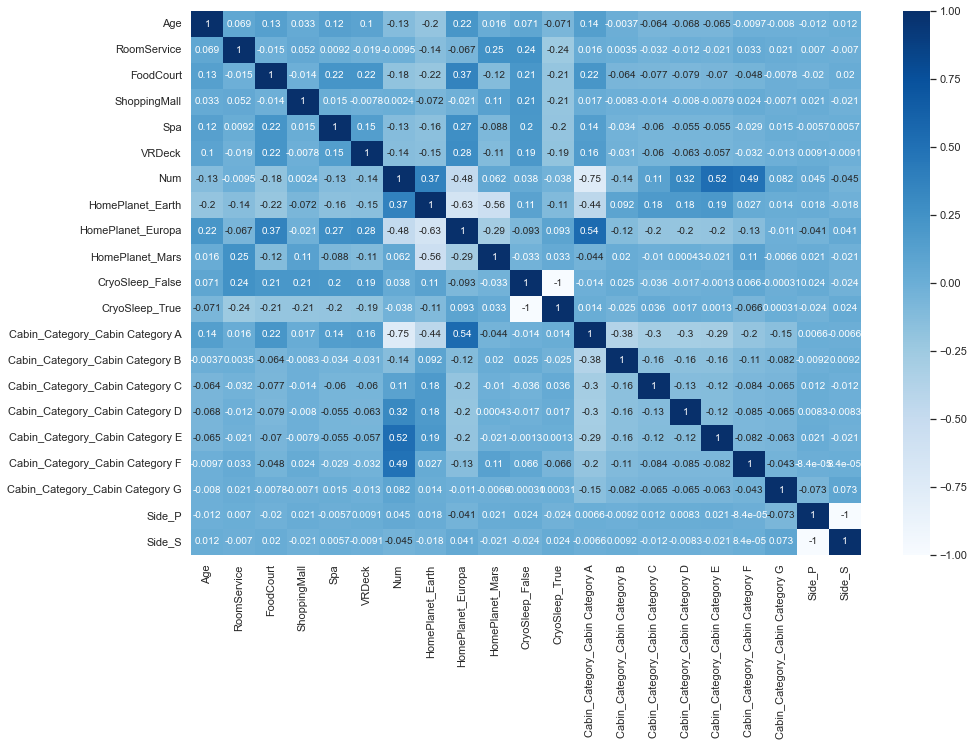

In [89]:
# droping columns we don't need
#del new_raw_data['CarName']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Num', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Cabin_Category_Cabin Category A',
       'Cabin_Category_Cabin Category B', 'Cabin_Category_Cabin Category C',
       'Cabin_Category_Cabin Category D', 'Cabin_Category_Cabin Category E',
       'Cabin_Category_Cabin Category F', 'Cabin_Category_Cabin Category G',
       'Side_P', 'Side_S']

pc = new_raw_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

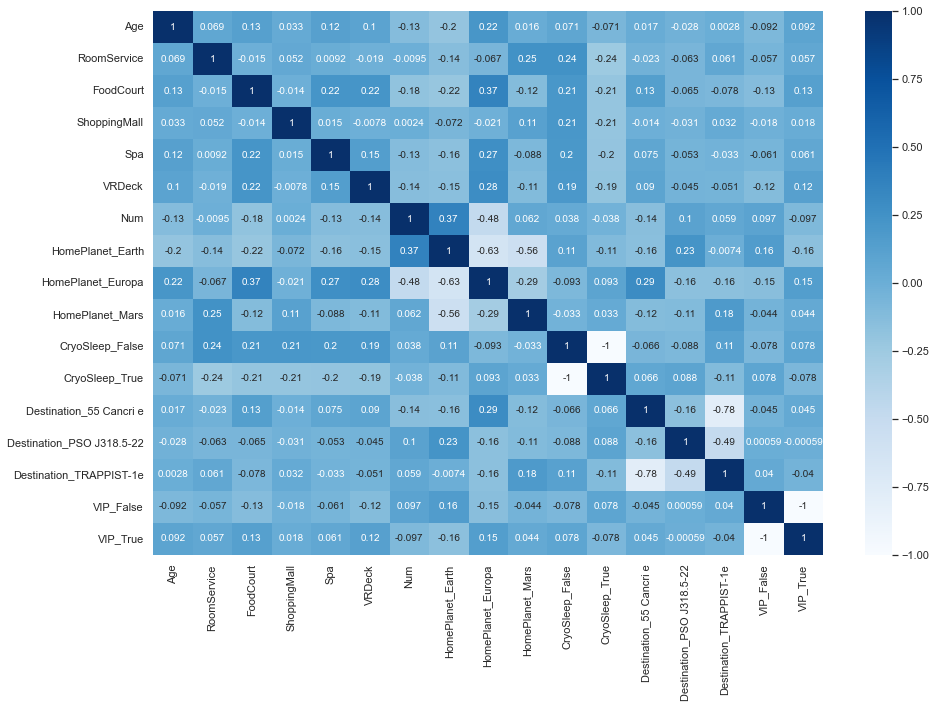

In [90]:
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Num', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True']

pc = new_raw_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

### Feature Importance

Steps of Running Feature Importance

- Split the data into X & y

- Run a Tree-based estimators (i.e. decision trees & random forests)

- Run Feature Importance

- We measure the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature

More info: https://christophm.github.io/interpretable-ml-book/feature-importance.html

In [91]:
from sklearn.tree import DecisionTreeClassifier

# deleting for rerun
try:
    del final_fi
except:
    print("")

# Split the data into X & y

X = new_raw_data.drop(['Transported','PassengerId','Name'], axis = 1).values
X_columns = new_raw_data.drop(['Transported','PassengerId','Name'], axis = 1)
y = new_raw_data['Transported']

print(X.shape)
print(y.shape)

# Run a Tree-based estimators (i.e. decision trees & random forests)
dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

# If you want to learn how Decesion Trees work, read here: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Calculating FI
for i, column in enumerate(new_raw_data.drop(['Transported','PassengerId','Name'], axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data

final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

(8693, 34)
(8693,)
Importance of feature Age:, 0.052
Importance of feature RoomService:, 0.055
Importance of feature FoodCourt:, 0.073
Importance of feature ShoppingMall:, 0.019
Importance of feature Spa:, 0.102
Importance of feature VRDeck:, 0.103
Importance of feature Num:, 0.069
Importance of feature HomePlanet_Earth:, 0.083
Importance of feature HomePlanet_Europa:, 0.014
Importance of feature HomePlanet_Mars:, 0.002
Importance of feature CryoSleep_False:, 0.000
Importance of feature CryoSleep_True:, 0.304
Importance of feature Destination_55 Cancri e:, 0.003
Importance of feature Destination_PSO J318.5-22:, 0.005
Importance of feature Destination_TRAPPIST-1e:, 0.006
Importance of feature VIP_False:, 0.000
Importance of feature VIP_True:, 0.000
Importance of feature Deck_A:, 0.003
Importance of feature Deck_B:, 0.001
Importance of feature Deck_C:, 0.005
Importance of feature Deck_D:, 0.002
Importance of feature Deck_E:, 0.037
Importance of feature Deck_F:, 0.002
Importance of featur

index                         Variable  Feature Importance Score
0      11                   CryoSleep_True                  0.304333
1       5                           VRDeck                  0.102780
2       4                              Spa                  0.101945
3       7                 HomePlanet_Earth                  0.082786
4       2                        FoodCourt                  0.072910
5       6                              Num                  0.069109
6       1                      RoomService                  0.055012
7       0                              Age                  0.052242
8      21                           Deck_E                  0.036777
9      32                           Side_P                  0.019313
10      3                     ShoppingMall                  0.019069
11     33                           Side_S                  0.018404
12      8                HomePlanet_Europa                  0.013683
13     28  Cabin_Category_Cabin Category D                  0.012062
14     14          Destination_TRAPPIST-1e                  0.005908
15     19                           Deck_C                  0.004963
16     13        Destination_PSO J318.5-22                  0.004826
17     25  Cabin_Category_Cabin Category A                  0.003476
18     12          Destination_55 Cancri e                  0.002937
19     27  Cabin_Category_Cabin Category C                  0.002667
20     17                           Deck_A                  0.002645
21     23                           Deck_G                  0.002063
22     22                           Deck_F                  0.002032
23     29  Cabin_Category_Cabin Category E                  0.001929
24      9                  HomePlanet_Mars                  0.001529
25     20                           Deck_D                  0.001517
26     18                           Deck_B                  0.001464
27     31  Cabin_Category_Cabin Category G                  0.001348
28     26  Cabin_Category_Cabin Category B                  0.000269
29     24                           Deck_T                  0.000000
30     10                  CryoSleep_False                  0.000000
31     16                         VIP_True                  0.000000
32     30  Cabin_Category_Cabin Category F                  0.000000
33     15                        VIP_False                  0.000000

## 10. Training & Running the classification model

In [92]:

from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

# running the model
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
y_pred = clf.predict(X)
print('Score', clf.score(X, y))

pred_proba_t = clf.predict_proba(X)
log_loss = log_loss(y, pred_proba_t)
log_loss


print('Log Loss', log_loss)


Score 0.8057057402507765
Log Loss 0.4065970058589728


### Pre-processing the Test data & Running the model on it & Sumbiting it

In [93]:
######################################     Loading the data   #############################################
test_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//test.csv")

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

######################################     # chaning the types so we can visualize   #####################################
strings = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Name']
numeric = [ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for s in strings:
    test_data[s] = test_data[s].astype(str)
    
for n in numeric:
    test_data[n] = test_data[n].astype(float)

##################################     # adding 3 more columns   #############################################
test_data[['Deck', 'Num', 'Side']] = test_data['Cabin'].str.split('/', expand=True) 

del test_data['Cabin']

############################     # creating a new field for cabin number based on findings   #############################################

test_data['Num'][test_data['Num'].isna()] = 99999
test_data['Num'] = test_data['Num'].astype(int)

test_data['Cabin_Category'] = 'Uknown'
test_data['Cabin_Category'][test_data['Num'] <= 300 ] = 'Cabin Category A'
test_data['Cabin_Category'][test_data['Num'] > 300 ] = 'Cabin Category B'
test_data['Cabin_Category'][test_data['Num'] > 600 ] = 'Cabin Category C'
test_data['Cabin_Category'][test_data['Num'] > 900 ] = 'Cabin Category D'
test_data['Cabin_Category'][test_data['Num'] > 1200 ] = 'Cabin Category E'
test_data['Cabin_Category'][test_data['Num'] > 1500 ] = 'Cabin Category F'
test_data['Cabin_Category'][test_data['Num'] > 1800 ] = 'Cabin Category G'

# putting the np.nan back
test_data['Num'][test_data['Num'] == 99999] = np.nan

##################################        changing missing values to mode and median   ##################################

strings2 = ['HomePlanet', 'CryoSleep', 'Destination','VIP', 'Deck', 'Cabin_Category', 'Side']
numeric2 = [ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']

for s in strings2:
    mode = test_data[s].mode()[0]
    test_data[s]= test_data[s].fillna(mode)
    test_data[s][test_data[s] == 'nan'] = mode
    
for n in numeric2:
    test_data[n]= test_data[n].astype(float)
    median = test_data[n].median()
    test_data[n]= test_data[n].fillna(median)
    
##################################        Scaling the data   ##################################
test_data[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = scaler.fit_transform(test_data[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])


##################################         Making categorical variables into numeric representation      ##################################        
test_data = pd.get_dummies(test_data, columns = ['HomePlanet', 'CryoSleep', 'Destination','VIP', 'Deck', 'Cabin_Category', 'Side'])


##################################       # Split the data into X & y        ##################################       

X_test = test_data.drop(['PassengerId','Name'], axis = 1).values

 
###############################        Making Predictions       #################################
y_pred = clf.predict(X_test)


###############################       # creating the output      ###############################       
evaluation_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//test.csv")
evaluation_data['Transported'] = y_pred

output = evaluation_data[['PassengerId','Transported']]

#a={1:True,0:False}
#output["Transported"]=output["Transported"].map(a)

# Output to csv
output.to_csv('submission1.csv', index=False)

#output

# This Model gives an accuracy of 0.78770 and a place of 1000+
# Score: 0.78957


In [94]:
output

PassengerId Transported
0        0013_01        True
1        0018_01       False
2        0019_01        True
3        0021_01        True
4        0023_01        True
5        0027_01        True
6        0029_01        True
7        0032_01        True
8        0032_02        True
9        0033_01        True
10       0037_01       False
11       0040_01       False
12       0040_02        True
13       0042_01       False
14       0046_01       False
15       0046_02       False
16       0046_03       False
17       0047_01        True
18       0047_02        True
19       0047_03       False
20       0048_01       False
21       0049_01       False
22       0054_01        True
23       0054_02        True
24       0054_03        True
25       0055_01       False
26       0057_01        True
27       0059_01        True
28       0060_01       False
29       0063_01        True
30       0065_01        True
31       0075_01       False
32       0079_01        True
33       0080_01       False
34       0083_01       False
35       0087_01       False
36       0089_01        True
37       0093_01       False
38       0094_01        True
39       0094_02       False
40       0095_01        True
41       0096_01        True
42       0100_01        True
43       0100_02       False
44       0104_01       False
45       0106_01        True
46       0109_01       False
47       0117_01       False
48       0118_01       False
49       0121_01       False
50       0124_01        True
51       0125_01        True
52       0125_02       False
53       0130_01        True
54       0131_01        True
55       0132_01        True
56       0135_01       False
57       0137_01        True
58       0142_01        True
59       0142_02       False
60       0142_03        True
61       0143_01        True
62       0145_01       False
63       0150_01        True
64       0150_02        True
65       0153_01       False
66       0154_01        True
67       0155_01       False
68       0156_01       False
69       0157_01       False
70       0158_01       False
71       0158_02        True
72       0159_01       False
73       0161_01       False
74       0162_01        True
75       0166_01       False
76       0168_01        True
77       0175_01        True
78       0175_02       False
79       0175_03        True
80       0175_04        True
81       0175_05       False
82       0176_01       False
83       0180_01       False
84       0184_01        True
85       0185_01        True
86       0187_01        True
87       0191_01       False
88       0194_01        True
89       0194_02        True
90       0194_03       False
91       0204_01       False
92       0208_01       False
93       0209_01       False
94       0214_01       False
95       0214_02       False
96       0215_01        True
97       0218_01       False
98       0226_01        True
99       0227_01       False
100      0228_01        True
101      0228_02        True
102      0228_03        True
103      0228_04       False
104      0230_01        True
105      0230_02       False
106      0235_01        True
107      0236_01        True
108      0238_01       False
109      0247_01        True
110      0247_02        True
111      0249_01       False
112      0256_01        True
113      0259_01        True
114      0262_01       False
115      0264_01        True
116      0264_02        True
117      0264_03       False
118      0266_01       False
119      0266_02       False
120      0268_01       False
121      0268_02       False
122      0271_01       False
123      0272_01       False
124      0273_01        True
125      0273_02        True
126      0273_03       False
127      0274_01       False
128      0274_02        True
129      0276_01       False
130      0276_02        True
131      0279_01       False
132      0280_01        True
133      0284_01        True
134      0292_01       False
135      0293_01        True
136      0295_01       False
137

## 11. Model Optimization

In [ ]:
# pip uninstall xgboost 

In [ ]:
#pip install xgboost==0.90

In [95]:
################################################    OPTIMISED   ############################################################

from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


classifier=xgboost.XGBClassifier(learning_rate=0.02, n_estimators=600, silent=True, nthread=1)

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7,10],
    "gamma":[0.0,0.1,0.2,0.3,0.4,0.5, 1, 1.5, 2, 5],
    "colsample_bytree":[0.3,0.4,0.5,0.7, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0]}

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='roc_auc', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# fitting it
clf.fit(X,y)

# getting the model with the best parameters
clf.best_estimator_

final_model = clf.best_estimator_

# fitting it
final_model.fit(X,y)
print('Score', final_model.score(X, y))

pred_proba_t = final_model.predict_proba(X)

log_loss = log_loss(y, pred_proba_t)
log_loss

print('Log Loss', log_loss)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   40.9s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  6.1min finished
C:\Users\pitsi\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip

In [97]:
###############################        Making Predictions       #################################
y_pred = final_model.predict(X_test)


###############################       # creating the output      ###############################       
evaluation_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//test.csv")
evaluation_data['Transported'] = y_pred

output = evaluation_data[['PassengerId','Transported']]

#a={1:True,0:False}
#output["Transported"]=output["Transported"].map(a)

# Output to csv
output.to_csv('submission2.csv', index=False)

output

# This Model gives an accuracy of 0.79331 and a place of 700+

PassengerId Transported
0        0013_01        True
1        0018_01       False
2        0019_01        True
3        0021_01        True
4        0023_01        True
5        0027_01        True
6        0029_01        True
7        0032_01        True
8        0032_02        True
9        0033_01        True
10       0037_01       False
11       0040_01       False
12       0040_02        True
13       0042_01        True
14       0046_01       False
15       0046_02       False
16       0046_03       False
17       0047_01        True
18       0047_02        True
19       0047_03       False
20       0048_01        True
21       0049_01       False
22       0054_01        True
23       0054_02        True
24       0054_03       False
25       0055_01       False
26       0057_01        True
27       0059_01        True
28       0060_01       False
29       0063_01        True
30       0065_01        True
31       0075_01       False
32       0079_01        True
33       0080_01       False
34       0083_01       False
35       0087_01       False
36       0089_01        True
37       0093_01        True
38       0094_01        True
39       0094_02       False
40       0095_01        True
41       0096_01        True
42       0100_01        True
43       0100_02       False
44       0104_01       False
45       0106_01        True
46       0109_01       False
47       0117_01       False
48       0118_01        True
49       0121_01       False
50       0124_01        True
51       0125_01        True
52       0125_02       False
53       0130_01        True
54       0131_01        True
55       0132_01        True
56       0135_01       False
57       0137_01        True
58       0142_01        True
59       0142_02       False
60       0142_03        True
61       0143_01        True
62       0145_01       False
63       0150_01        True
64       0150_02        True
65       0153_01        True
66       0154_01        True
67       0155_01       False
68       0156_01       False
69       0157_01       False
70       0158_01       False
71       0158_02        True
72       0159_01       False
73       0161_01       False
74       0162_01        True
75       0166_01        True
76       0168_01        True
77       0175_01        True
78       0175_02       False
79       0175_03        True
80       0175_04        True
81       0175_05       False
82       0176_01       False
83       0180_01       False
84       0184_01        True
85       0185_01        True
86       0187_01        True
87       0191_01       False
88       0194_01        True
89       0194_02        True
90       0194_03       False
91       0204_01       False
92       0208_01        True
93       0209_01       False
94       0214_01       False
95       0214_02       False
96       0215_01        True
97       0218_01       False
98       0226_01        True
99       0227_01       False
100      0228_01        True
101      0228_02        True
102      0228_03        True
103      0228_04       False
104      0230_01        True
105      0230_02       False
106      0235_01       False
107      0236_01        True
108      0238_01       False
109      0247_01        True
110      0247_02        True
111      0249_01       False
112      0256_01        True
113      0259_01        True
114      0262_01       False
115      0264_01        True
116      0264_02        True
117      0264_03       False
118      0266_01       False
119      0266_02       False
120      0268_01       False
121      0268_02       False
122      0271_01       False
123      0272_01       False
124      0273_01        True
125      0273_02        True
126      0273_03       False
127      0274_01       False
128      0274_02        True
129      0276_01       False
130      0276_02        True
131      0279_01       False
132      0280_01        True
133      0284_01        True
134      0292_01       False
135      0293_01        True
136      0295_01       False
137

## 12. Trying a new way of replacing missing values

### 12.1. Applying the same steps as before exept the "replacing missing values" & "get dummies"

In [98]:
######################################     Loading the data   #############################################
raw_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//train.csv")
test_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//test.csv")

# printing the shapes
print('raw_data',raw_data.shape)
print('test_data',test_data.shape)

# combining the 2 datasets
raw_data = pd.concat([raw_data.drop(['Transported'], axis = 1), test_data])
print('raw_data',raw_data.shape)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

######################################     # chaning the types so we can visualize   #####################################
strings = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Name']
numeric = [ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for s in strings:
    raw_data[s] = raw_data[s].astype(str)
    
for n in numeric:
    raw_data[n] = raw_data[n].astype(float)

##################################     # adding 3 more columns   #############################################
raw_data[['Deck', 'Num', 'Side']] = raw_data['Cabin'].str.split('/', expand=True) 

del raw_data['Cabin']

############################     # creating a new field for cabin number based on findings   #############################################

raw_data['Num'][raw_data['Num'].isna()] = 99999
raw_data['Num'] = raw_data['Num'].astype(int)

raw_data['Cabin_Category'] = 'Uknown'
raw_data['Cabin_Category'][raw_data['Num'] <= 300 ] = 'Cabin Category A'
raw_data['Cabin_Category'][raw_data['Num'] > 300 ] = 'Cabin Category B'
raw_data['Cabin_Category'][raw_data['Num'] > 600 ] = 'Cabin Category C'
raw_data['Cabin_Category'][raw_data['Num'] > 900 ] = 'Cabin Category D'
raw_data['Cabin_Category'][raw_data['Num'] > 1200 ] = 'Cabin Category E'
raw_data['Cabin_Category'][raw_data['Num'] > 1500 ] = 'Cabin Category F'
raw_data['Cabin_Category'][raw_data['Num'] > 1800 ] = 'Cabin Category G'
raw_data['Cabin_Category'][raw_data['Num'] > 9800 ] = np.nan

# putting the np.nan back
raw_data['Num'][raw_data['Num'] == 99999] = np.nan


##################################        Scaling the data   ##################################
raw_data[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = scaler.fit_transform(raw_data[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

# droping the name 
del raw_data['Name']

raw_data (8693, 14)
test_data (4277, 13)
raw_data (12970, 13)


In [99]:
raw_data.head()

PassengerId HomePlanet CryoSleep  Destination       Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  0.493671  False     0.000000   
1     0002_01      Earth     False  TRAPPIST-1e  0.303797  False     0.007608   
2     0003_01     Europa     False  TRAPPIST-1e  0.734177   True     0.003001   
3     0003_02     Europa     False  TRAPPIST-1e  0.417722  False     0.000000   
4     0004_01      Earth     False  TRAPPIST-1e  0.202532  False     0.021149   

   FoodCourt  ShoppingMall       Spa    VRDeck Deck  Num Side  \
0   0.000000      0.000000  0.000000  0.000000    B  0.0    P   
1   0.000302      0.001064  0.024500  0.001823    F  0.0    S   
2   0.119948      0.000000  0.299670  0.002030    A  0.0    S   
3   0.043035      0.015793  0.148563  0.007997    A  0.0    S   
4   0.002348      0.006428  0.025214  0.000083    F  1.0    S   

     Cabin_Category  
0  Cabin Category A  
1  Cabin Category A  
2  Cabin Category A  
3  Cabin Category A  
4  Cabin Category A

## 12.2. Dealing with missing values

### Notes:
- As we have lots of missing values per column, we will try an interesting strategy
- We will combine both the datasets
- We will run XGBoost per column to make a prediction
- We will replace the missing values with the predictions

In [100]:
from sklearn.metrics import log_loss


# defining strings to loop through
strings = ['HomePlanet', 'CryoSleep', 'Destination','VIP', 'Deck', 'Side','Cabin_Category']   ##### REMEMBER TO CHANGE THIS!!!
numeric = ['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']

# ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# chaning the ID to use later to rejoin
raw_data['PassengerId'] = raw_data['PassengerId'].astype(str)
raw_data['PassengerId'] = raw_data['PassengerId'].str.replace('_','').astype(int)


#strings = ['HomePlanet']

try:
    del Scores_df
    del data
except:
    print("")
    
for c in strings:
    print(c)
    
    # creating a coppy
    data = raw_data.copy()
    
    # updating the numbers with median
    for n in numeric:
        median = data[n].median()
        data[n] = data[n].fillna(median)
    
    # updating the categories with Unknown
    for s in strings:
        data[s] = data[s].fillna('Unknown')
        data[s][data[s]=='nan'] = 'Unknown'
        
    # list without the y
    strings_without_y = strings.copy()
    if c in strings_without_y: strings_without_y.remove(c)
        
    # turning categorical values into numeric representation
    data = pd.get_dummies(data, columns = strings_without_y)
    
    #droping "Unkown"
    data2 = data[data[c] != 'Unknown']
    
    # data for only unkowns
    data_unknown = data[data[c]=='Unknown']    
    
    # separating the X and Y
    X = data2.drop([c], axis = 1).values
    y = data2[c].astype(str).values
    
    # running the model
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
    print('Score', clf.score(X, y))
    
    # saving the scores in df to evaluate later
    score = clf.score(X, y)
    log_loss_score = log_loss(y, clf.predict_proba(X))
    
    score2 = pd.DataFrame({'Variable': [c], 'Score': [score], 'Log Loss': [log_loss_score]})
    
    try:
        Scores_df = pd.concat([Scores_df,score2], ignore_index = True)
    except:
        Scores_df = score2
    
    # X for unkown - making predictions on the missing values
    X_unknown = data_unknown.drop([c], axis = 1).values
    y_pred = clf.predict(X_unknown)
    
    data_unknown['Prediction'] = y_pred.astype(str)
    
    # limiting the df
    data_unknown = data_unknown[['PassengerId','Prediction']]
    data_unknown.columns = ['PassengerId','Prediction'+'-'+c]
    
    # left joining the predictions back to the original dataframe
    combined_data_with_predictions = raw_data.merge(data_unknown, how = 'left', on = 'PassengerId')
    
    #left joining on original file so we have less missing values in the next loop
    raw_data = raw_data.merge(data_unknown, how = 'left', on = 'PassengerId')
    raw_data[c][raw_data[c].isna()] = raw_data['Prediction'+'-'+c]
    raw_data[c][raw_data[c] == 'nan'] = raw_data['Prediction'+'-'+c]
    del raw_data['Prediction'+'-'+c]  
    
    
  


HomePlanet
Score 0.9282447563475792
CryoSleep
Score 0.9535545023696682
Destination
Score 0.7066792690611217
VIP
Score 0.9793277576140129
Deck
Score 0.7748401862520716
Side
Score 0.5670428537605556
Cabin_Category
Score 1.0


In [108]:
raw_data.isna().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Destination         0
Age               270
VIP                 0
RoomService       263
FoodCourt         289
ShoppingMall      306
Spa               284
VRDeck            268
Deck                0
Num               299
Side                0
Cabin_Category      0
dtype: int64

In [109]:
Scores_df

Variable     Score      Log Loss
0      HomePlanet  0.928245  1.726522e-01
1       CryoSleep  0.953555  1.046894e-01
2     Destination  0.706679  6.871237e-01
3             VIP  0.979328  6.867720e-02
4            Deck  0.774840  7.975997e-01
5            Side  0.567043  6.740295e-01
6  Cabin_Category  1.000000  6.487493e-15

In [ ]:
raw_data.isnull().sum()

In [110]:
# Repeating the same process for Numerics


for n in numeric:
    print(n)
    
    # creating a coppy
    data = raw_data.copy()
    
    # changing the target column to "Unkown"
    data[n][data[n].isnull()] = "Unkown"
    
    # list without the y
    strings_without_y = numeric.copy()
    if n in strings_without_y: strings_without_y.remove(n)
    
    # updating the numbers with mean
    for nu in strings_without_y:
        mean_v = data[nu].mean()
        data[nu] = data[nu].fillna(mean_v)
    
    # turning categorical values into numeric representation
    data = pd.get_dummies(data, columns = strings)
    
    # data for only kowns 
    data2 = data[data[n] != "Unkown"]
    
    # data for only unkowns
    data_unknown = data[data[n]=="Unkown"]

    # separating the X and Y
    X = data2.drop([n], axis = 1).values
    y = data2[n].values
    
    reg = GradientBoostingRegressor(random_state=0)
    reg.fit(X, y)

    # Model Accuracy on testing dataset
    print('The Accuracy  on the testing dataset is: ', reg.score(X, y) )
    print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y,reg.predict(X))))
    print('The MAE  on the testing dataset is: ',mean_absolute_error(y,reg.predict(X)))

    # saving the scores in df to evaluate later
    score = reg.score(X, y)
    score2 = pd.DataFrame({'Variable': [n], 'Score': [score]})
    
    try:
        Scores_df = pd.concat([Scores_df,score2], ignore_index = True)
    except:
        Scores_df = score2
    
    # X for unkown - making predictions on the missing values
    X_unknown = data_unknown.drop([n], axis = 1).values
    y_pred = reg.predict(X_unknown)
    
    data_unknown['Prediction'] = y_pred
    
    # limiting the df
    data_unknown = data_unknown[['PassengerId','Prediction']]
    data_unknown.columns = ['PassengerId','Prediction'+'-'+n]
    
    # left joining the predictions back to the original dataframe
    combined_data_with_predictions = combined_data_with_predictions.merge(data_unknown, how = 'left', on = 'PassengerId')
    
    #left joining on original file so we have less missing values in the next loop
    raw_data = raw_data.merge(data_unknown, how = 'left', on = 'PassengerId')
    raw_data[n][raw_data[n].isna()] = raw_data['Prediction'+'-'+n]
    del raw_data['Prediction'+'-'+n]

Age
The Accuracy  on the testing dataset is:  0.19019778494445017
The RMSE  on the testing dataset is:  0.16387903944946283
The MAE  on the testing dataset is:  0.12945400984122876
RoomService
The Accuracy  on the testing dataset is:  0.38496340902375015
The RMSE  on the testing dataset is:  0.0354472648249718
The MAE  on the testing dataset is:  0.01425320004524871
FoodCourt
The Accuracy  on the testing dataset is:  0.47955865276134135
The RMSE  on the testing dataset is:  0.038337157311278645
The MAE  on the testing dataset is:  0.013398871279258802
ShoppingMall
The Accuracy  on the testing dataset is:  0.35296136629081576
The RMSE  on the testing dataset is:  0.02022046000587643
The MAE  on the testing dataset is:  0.007905178485087627
Spa
The Accuracy  on the testing dataset is:  0.42533232136739096
The RMSE  on the testing dataset is:  0.03823614299769226
The MAE  on the testing dataset is:  0.014389746789270137
VRDeck
The Accuracy  on the testing dataset is:  0.4070816392174236
T

In [111]:
Scores_df

Variable     Score      Log Loss
0       HomePlanet  0.928245  1.726522e-01
1        CryoSleep  0.953555  1.046894e-01
2      Destination  0.706679  6.871237e-01
3              VIP  0.979328  6.867720e-02
4             Deck  0.774840  7.975997e-01
5             Side  0.567043  6.740295e-01
6   Cabin_Category  1.000000  6.487493e-15
7              Age  0.190198           NaN
8      RoomService  0.384963           NaN
9        FoodCourt  0.479559           NaN
10    ShoppingMall  0.352961           NaN
11             Spa  0.425332           NaN
12          VRDeck  0.407082           NaN
13             Num  0.996303           NaN

In [ ]:
raw_data.isnull().sum()

## 12.3. Training a Model on clean raw data

In [112]:
######################################     Loading the data again to join the y   #############################################
raw_data2 = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//train.csv")
test_data2 = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//test.csv")
print('raw_data2',raw_data2.shape)
print('test_data2',test_data2.shape)

raw_data2['PassengerId'] = raw_data2['PassengerId'].astype(str)
raw_data2['PassengerId'] = raw_data2['PassengerId'].str.replace('_','').astype(int)

# joining into the combined dataset the "Transported" column
print('raw_data',raw_data.shape)
print('raw_data2',raw_data2.shape)

# Joining using inner join so the final table will only have data that has y
model_data = raw_data.merge(raw_data2[['PassengerId','Transported']], how = 'inner', on='PassengerId')
print('model_data',model_data.shape)

# Runing another Left join and then exlcuding all the matches so I have the X_Test data left
X_test = raw_data.merge(raw_data2[['PassengerId','Transported']], how = 'left', on='PassengerId')
X_test = X_test[X_test['Transported'].isna()]
del X_test['Transported']
print('X_test',X_test.shape)

# turning categorical values into numeric representation
X_test = pd.get_dummies(X_test, columns = strings)

raw_data2 (8693, 14)
test_data2 (4277, 13)
raw_data (12970, 15)
raw_data2 (8693, 14)
model_data (8693, 16)
X_test (4277, 15)


In [113]:
model_data.head()

PassengerId HomePlanet CryoSleep  Destination       Age    VIP  \
0          101     Europa     False  TRAPPIST-1e  0.493671  False   
1          201      Earth     False  TRAPPIST-1e  0.303797  False   
2          301     Europa     False  TRAPPIST-1e  0.734177   True   
3          302     Europa     False  TRAPPIST-1e  0.417722  False   
4          401      Earth     False  TRAPPIST-1e  0.202532  False   

   RoomService  FoodCourt  ShoppingMall       Spa    VRDeck Deck  Num Side  \
0     0.000000   0.000000      0.000000  0.000000  0.000000    B  0.0    P   
1     0.007608   0.000302      0.001064  0.024500  0.001823    F  0.0    S   
2     0.003001   0.119948      0.000000  0.299670  0.002030    A  0.0    S   
3     0.000000   0.043035      0.015793  0.148563  0.007997    A  0.0    S   
4     0.021149   0.002348      0.006428  0.025214  0.000083    F  1.0    S   

     Cabin_Category  Transported  
0  Cabin Category A        False  
1  Cabin Category A         True  
2  Cabin Category A        False  
3  Cabin Category A        False  
4  Cabin Category A         True

### Applying the same preprocessing steps as before & Running Model


In [114]:
from sklearn.metrics import log_loss

# turning categorical values into numeric representation
model_data = pd.get_dummies(model_data, columns = strings)

# separating the X and Y
X = model_data.drop(['Transported'], axis = 1).values
X_columns = model_data.drop(['Transported'], axis = 1)
y = model_data['Transported'].values

# running the model
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
y_pred = clf.predict(X)

pred_proba_t = clf.predict_proba(X)
log_loss = log_loss(y, pred_proba_t)
print('Score', clf.score(X, y))
print('Logistic Loss', log_loss)


Score 0.8101921085931209
Logistic Loss 0.4010655256446601


## 12.4. Tuning / Optimizing the model

In [115]:
################################################    OPTIMISED   ############################################################

from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


classifier=xgboost.XGBClassifier(learning_rate=0.02, n_estimators=600, silent=True, nthread=1)

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7,10],
    "gamma":[0.0,0.1,0.2,0.3,0.4,0.5, 1, 1.5, 2, 5],
    "colsample_bytree":[0.3,0.4,0.5,0.7, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0]}

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)

#clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='roc_auc', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# Trying with Log Loss
#clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='neg_log_loss', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)

# Trying with Accuracy
clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='accuracy', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)


# fitting it
clf.fit(X,y)

# getting the model with the best parameters
clf.best_estimator_

final_model = clf.best_estimator_

# fitting it
final_model.fit(X,y)
print('Score', final_model.score(X, y))

pred_proba_t = final_model.predict_proba(X)

log_loss = log_loss(y, pred_proba_t)
log_loss

print('Logistic Loss', log_loss)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   42.6s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  6.7min finished
C:\Users\pitsi\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:47:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:47:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip

In [ ]:
# Accuracy with roc_auc is: 0.8831243529276429
# Log Loss with roc_auc is:0.27364994794804526

# Accuracy with neg_log_loss is: 0.8831243529276429
# Log Loss with neg_log_loss is: 0.27364994794804526

# Accuracy with accuracy is: 0.8696652479006097
# Log Loss with accuracy is: 0.29741915028734395

In [116]:
###############################        Making Predictions       #################################
y_pred = final_model.predict(X_test.values)


###############################       # creating the output      ###############################       
evaluation_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model///test.csv")
evaluation_data['Transported'] = y_pred

output = evaluation_data[['PassengerId','Transported']]

#a={1:True,0:False}
#output["Transported"]=output["Transported"].map(a)

# Output to csv
output.to_csv('submission3.csv', index=False)

output

# This Model gives an accuracy of 0.80196 and a place of 329

PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
5        0027_01        False
6        0029_01         True
7        0032_01         True
8        0032_02         True
9        0033_01         True
10       0037_01        False
11       0040_01        False
12       0040_02        False
13       0042_01         True
14       0046_01        False
15       0046_02        False
16       0046_03        False
17       0047_01         True
18       0047_02         True
19       0047_03        False
20       0048_01         True
21       0049_01        False
22       0054_01         True
23       0054_02         True
24       0054_03        False
25       0055_01        False
26       0057_01         True
27       0059_01        False
28       0060_01         True
29       0063_01         True
30       0065_01         True
31       0075_01        False
32       0079_01         True
33       0080_01        False
34       0083_01        False
35       0087_01        False
36       0089_01         True
37       0093_01         True
38       0094_01        False
39       0094_02        False
40       0095_01         True
41       0096_01        False
42       0100_01         True
43       0100_02         True
44       0104_01        False
45       0106_01         True
46       0109_01        False
47       0117_01        False
48       0118_01         True
49       0121_01        False
50       0124_01         True
51       0125_01         True
52       0125_02        False
53       0130_01         True
54       0131_01         True
55       0132_01         True
56       0135_01        False
57       0137_01         True
58       0142_01         True
59       0142_02        False
60       0142_03         True
61       0143_01         True
62       0145_01        False
63       0150_01         True
64       0150_02         True
65       0153_01        False
66       0154_01        False
67       0155_01        False
68       0156_01         True
69       0157_01        False
70       0158_01        False
71       0158_02         True
72       0159_01        False
73       0161_01        False
74       0162_01         True
75       0166_01         True
76       0168_01         True
77       0175_01         True
78       0175_02        False
79       0175_03         True
80       0175_04        False
81       0175_05        False
82       0176_01        False
83       0180_01        False
84       0184_01        False
85       0185_01         True
86       0187_01         True
87       0191_01        False
88       0194_01         True
89       0194_02         True
90       0194_03        False
91       0204_01        False
92       0208_01        False
93       0209_01        False
94       0214_01        False
95       0214_02        False
96       0215_01         True
97       0218_01        False
98       0226_01         True
99       0227_01        False
100      0228_01         True
101      0228_02         True
102      0228_03         True
103      0228_04        False
104      0230_01         True
105      0230_02        False
106      0235_01        False
107      0236_01         True
108      0238_01        False
109      0247_01         True
110      0247_02         True
111      0249_01        False
112      0256_01         True
113      0259_01         True
114      0262_01        False
115      0264_01         True
116      0264_02         True
117      0264_03        False
118      0266_01        False
119      0266_02        False
120      0268_01        False
121      0268_02        False
122      0271_01        False
123      0272_01        False
124      0273_01         True
125      0273_02         True
126      0273_03        False
127      0274_01        False
128      0274_02         True
129      0276_01        False
130      0276_02         True
131      0279_01        False
132      0280_0

## 13. Trying with less variables - Avoid overfit

In [117]:
final_fi

index                         Variable  Feature Importance Score
0      11                   CryoSleep_True                  0.304333
1       5                           VRDeck                  0.102780
2       4                              Spa                  0.101945
3       7                 HomePlanet_Earth                  0.082786
4       2                        FoodCourt                  0.072910
5       6                              Num                  0.069109
6       1                      RoomService                  0.055012
7       0                              Age                  0.052242
8      21                           Deck_E                  0.036777
9      32                           Side_P                  0.019313
10      3                     ShoppingMall                  0.019069
11     33                           Side_S                  0.018404
12      8                HomePlanet_Europa                  0.013683
13     28  Cabin_Category_Cabin Category D                  0.012062
14     14          Destination_TRAPPIST-1e                  0.005908
15     19                           Deck_C                  0.004963
16     13        Destination_PSO J318.5-22                  0.004826
17     25  Cabin_Category_Cabin Category A                  0.003476
18     12          Destination_55 Cancri e                  0.002937
19     27  Cabin_Category_Cabin Category C                  0.002667
20     17                           Deck_A                  0.002645
21     23                           Deck_G                  0.002063
22     22                           Deck_F                  0.002032
23     29  Cabin_Category_Cabin Category E                  0.001929
24      9                  HomePlanet_Mars                  0.001529
25     20                           Deck_D                  0.001517
26     18                           Deck_B                  0.001464
27     31  Cabin_Category_Cabin Category G                  0.001348
28     26  Cabin_Category_Cabin Category B                  0.000269
29     24                           Deck_T                  0.000000
30     10                  CryoSleep_False                  0.000000
31     16                         VIP_True                  0.000000
32     30  Cabin_Category_Cabin Category F                  0.000000
33     15                        VIP_False                  0.000000

In [118]:
final_fi['Variable'].values[0:14]

array(['CryoSleep_True', 'VRDeck', 'Spa', 'HomePlanet_Earth', 'FoodCourt',
       'Num', 'RoomService', 'Age', 'Deck_E', 'Side_P', 'ShoppingMall',
       'Side_S', 'HomePlanet_Europa', 'Cabin_Category_Cabin Category D'],
      dtype=object)

In [119]:

##############################      LIMITING THE DATA BASED ON FEATURE IMPORTANCES      #####################################################

# separating the X and Y
X = model_data[['CryoSleep_True', 'VRDeck', 'Spa', 'HomePlanet_Earth', 'Num',
       'FoodCourt', 'RoomService', 'Age', 'Deck_E', 'Side_P',
       'ShoppingMall', 'Side_S', 'Deck_G',
       'Cabin_Category_Cabin Category D']].values

y = model_data['Transported'].values

#########################################          RUNNING THE MODEL      #####################################################
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


classifier=xgboost.XGBClassifier(learning_rate=0.02, n_estimators=600, silent=True, nthread=1)

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7,10],
    "gamma":[0.0,0.1,0.2,0.3,0.4,0.5, 1, 1.5, 2, 5],
    "colsample_bytree":[0.3,0.4,0.5,0.7, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0]}

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)

#clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='roc_auc', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# Trying with Log Loss
clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='neg_log_loss', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)

# Trying with Accuracy
#clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='accuracy', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)


# fitting it
clf.fit(X,y)

# getting the model with the best parameters
clf.best_estimator_

final_model = clf.best_estimator_

# fitting it
final_model.fit(X,y)
print('Score', final_model.score(X, y))

pred_proba_t = final_model.predict_proba(X)

log_loss = log_loss(y, pred_proba_t)
log_loss

print('Logistic Loss', log_loss)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   24.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  3.9min finished
C:\Users\pitsi\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip

In [120]:
################################        Limiting X_test        #################################
X_test2 = X_test[['CryoSleep_True', 'VRDeck', 'Spa', 'HomePlanet_Earth', 'Num',
       'FoodCourt', 'RoomService', 'Age', 'Deck_E', 'Side_P',
       'ShoppingMall', 'Side_S', 'Deck_G',
       'Cabin_Category_Cabin Category D']]


###############################        Making Predictions       #################################
y_pred = final_model.predict(X_test2.values)


###############################       # creating the output      ###############################       
evaluation_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model///test.csv")
evaluation_data['Transported'] = y_pred

output = evaluation_data[['PassengerId','Transported']]

#a={1:True,0:False}
#output["Transported"]=output["Transported"].map(a)

# Output to csv
output.to_csv('submission4.csv', index=False)

output

# This Model gives an accuracy of 0.80009 and a place of 400+

PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
5        0027_01         True
6        0029_01         True
7        0032_01         True
8        0032_02         True
9        0033_01         True
10       0037_01        False
11       0040_01        False
12       0040_02         True
13       0042_01         True
14       0046_01        False
15       0046_02        False
16       0046_03        False
17       0047_01         True
18       0047_02         True
19       0047_03        False
20       0048_01         True
21       0049_01        False
22       0054_01         True
23       0054_02         True
24       0054_03        False
25       0055_01        False
26       0057_01         True
27       0059_01         True
28       0060_01         True
29       0063_01         True
30       0065_01         True
31       0075_01        False
32       0079_01         True
33       0080_01        False
34       0083_01        False
35       0087_01        False
36       0089_01         True
37       0093_01         True
38       0094_01         True
39       0094_02        False
40       0095_01         True
41       0096_01        False
42       0100_01         True
43       0100_02         True
44       0104_01        False
45       0106_01         True
46       0109_01        False
47       0117_01        False
48       0118_01        False
49       0121_01        False
50       0124_01         True
51       0125_01         True
52       0125_02        False
53       0130_01         True
54       0131_01        False
55       0132_01         True
56       0135_01        False
57       0137_01         True
58       0142_01         True
59       0142_02        False
60       0142_03         True
61       0143_01         True
62       0145_01        False
63       0150_01         True
64       0150_02         True
65       0153_01        False
66       0154_01        False
67       0155_01        False
68       0156_01         True
69       0157_01        False
70       0158_01        False
71       0158_02         True
72       0159_01        False
73       0161_01        False
74       0162_01         True
75       0166_01         True
76       0168_01         True
77       0175_01         True
78       0175_02        False
79       0175_03         True
80       0175_04        False
81       0175_05        False
82       0176_01        False
83       0180_01        False
84       0184_01         True
85       0185_01         True
86       0187_01         True
87       0191_01        False
88       0194_01         True
89       0194_02         True
90       0194_03        False
91       0204_01        False
92       0208_01        False
93       0209_01        False
94       0214_01        False
95       0214_02        False
96       0215_01         True
97       0218_01        False
98       0226_01         True
99       0227_01         True
100      0228_01         True
101      0228_02         True
102      0228_03         True
103      0228_04        False
104      0230_01         True
105      0230_02        False
106      0235_01        False
107      0236_01         True
108      0238_01        False
109      0247_01         True
110      0247_02         True
111      0249_01        False
112      0256_01         True
113      0259_01         True
114      0262_01        False
115      0264_01         True
116      0264_02         True
117      0264_03        False
118      0266_01        False
119      0266_02        False
120      0268_01        False
121      0268_02        False
122      0271_01        False
123      0272_01        False
124      0273_01         True
125      0273_02         True
126      0273_03        False
127      0274_01        False
128      0274_02         True
129      0276_01        False
130      0276_02         True
131      0279_01        False
132      0280_0

## 14. Trying the Recursive Feature Elimination Process

In [121]:
from sklearn.feature_selection import RFE

# separating the X and Y
X = model_data.drop(['Transported'], axis = 1).values
X_columns = model_data.drop(['Transported'], axis = 1)
y = model_data['Transported'].values

estimator = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_

print('Chosen best 10 feature by rfe:',X_columns.columns[selector.support_])

rfe_top_features = X_columns.columns[selector.support_]

# more info: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

Chosen best 10 feature by rfe: Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Num', 'HomePlanet_Europa', 'CryoSleep_False', 'Deck_G'],
      dtype='object')


In [122]:
##############################      LIMITING THE DATA BASED ON FEATURE IMPORTANCES      #####################################################

# separating the X and Y
X = model_data[rfe_top_features].values
y = model_data['Transported'].values

#########################################          RUNNING THE MODEL      #####################################################
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


classifier=xgboost.XGBClassifier(learning_rate=0.02, n_estimators=600, silent=True, nthread=1)

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7,10],
    "gamma":[0.0,0.1,0.2,0.3,0.4,0.5, 1, 1.5, 2, 5],
    "colsample_bytree":[0.3,0.4,0.5,0.7, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0]}

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)

#clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='roc_auc', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# Trying with Log Loss
clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='neg_log_loss', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)

# Trying with Accuracy
#clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='accuracy', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)


# fitting it
clf.fit(X,y)

# getting the model with the best parameters
clf.best_estimator_

final_model = clf.best_estimator_

# fitting it
final_model.fit(X,y)
print('Score', final_model.score(X, y))

pred_proba_t = final_model.predict_proba(X)

log_loss = log_loss(y, pred_proba_t)
log_loss

print('Logistic Loss', log_loss)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   20.2s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  3.5min finished
C:\Users\pitsi\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:59:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:59:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:59:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip

In [123]:
################################        Limiting X_test        #################################
X_test3 = X_test[rfe_top_features]


###############################        Making Predictions       #################################
y_pred = final_model.predict(X_test3.values)


###############################       # creating the output      ###############################       
evaluation_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model///test.csv")
evaluation_data['Transported'] = y_pred

output = evaluation_data[['PassengerId','Transported']]

#a={1:True,0:False}
#output["Transported"]=output["Transported"].map(a)

# Output to csv
output.to_csv('submission4.csv', index=False)

output

# This Model gives an accuracy of 0.79565 and a place of 400+

PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
5        0027_01        False
6        0029_01         True
7        0032_01         True
8        0032_02         True
9        0033_01         True
10       0037_01        False
11       0040_01        False
12       0040_02         True
13       0042_01         True
14       0046_01        False
15       0046_02        False
16       0046_03        False
17       0047_01         True
18       0047_02         True
19       0047_03        False
20       0048_01         True
21       0049_01        False
22       0054_01         True
23       0054_02         True
24       0054_03         True
25       0055_01        False
26       0057_01         True
27       0059_01         True
28       0060_01         True
29       0063_01         True
30       0065_01         True
31       0075_01        False
32       0079_01        False
33       0080_01         True
34       0083_01        False
35       0087_01        False
36       0089_01         True
37       0093_01         True
38       0094_01         True
39       0094_02        False
40       0095_01         True
41       0096_01        False
42       0100_01         True
43       0100_02         True
44       0104_01        False
45       0106_01         True
46       0109_01        False
47       0117_01        False
48       0118_01         True
49       0121_01        False
50       0124_01         True
51       0125_01         True
52       0125_02        False
53       0130_01         True
54       0131_01        False
55       0132_01         True
56       0135_01        False
57       0137_01        False
58       0142_01         True
59       0142_02        False
60       0142_03         True
61       0143_01         True
62       0145_01        False
63       0150_01         True
64       0150_02         True
65       0153_01        False
66       0154_01        False
67       0155_01        False
68       0156_01         True
69       0157_01        False
70       0158_01        False
71       0158_02        False
72       0159_01        False
73       0161_01        False
74       0162_01         True
75       0166_01         True
76       0168_01         True
77       0175_01         True
78       0175_02        False
79       0175_03         True
80       0175_04        False
81       0175_05        False
82       0176_01        False
83       0180_01        False
84       0184_01         True
85       0185_01         True
86       0187_01         True
87       0191_01        False
88       0194_01         True
89       0194_02         True
90       0194_03        False
91       0204_01        False
92       0208_01        False
93       0209_01        False
94       0214_01        False
95       0214_02        False
96       0215_01         True
97       0218_01        False
98       0226_01         True
99       0227_01        False
100      0228_01         True
101      0228_02         True
102      0228_03         True
103      0228_04        False
104      0230_01         True
105      0230_02        False
106      0235_01        False
107      0236_01         True
108      0238_01        False
109      0247_01         True
110      0247_02         True
111      0249_01        False
112      0256_01         True
113      0259_01         True
114      0262_01        False
115      0264_01         True
116      0264_02         True
117      0264_03        False
118      0266_01        False
119      0266_02        False
120      0268_01        False
121      0268_02        False
122      0271_01        False
123      0272_01        False
124      0273_01         True
125      0273_02         True
126      0273_03        False
127      0274_01        False
128      0274_02         True
129      0276_01        False
130      0276_02         True
131      0279_01        False
132      0280_0

## 15. Running our Final Model

In [124]:
################################################    OPTIMISED   ############################################################

from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

# separating the X and Y
X = model_data.drop(['Transported'], axis = 1).values
X_columns = model_data.drop(['Transported'], axis = 1)
y = model_data['Transported'].values


classifier=xgboost.XGBClassifier(learning_rate=0.02, n_estimators=600, silent=True, nthread=1)

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7,10],
    "gamma":[0.0,0.1,0.2,0.3,0.4,0.5, 1, 1.5, 2, 5],
    "colsample_bytree":[0.3,0.4,0.5,0.7, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0]}

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)

#clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='roc_auc', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# Trying with Log Loss
clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='neg_log_loss', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)

# Trying with Accuracy
#clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='accuracy', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)


# fitting it
clf.fit(X,y)

# getting the model with the best parameters
clf.best_estimator_

final_model = clf.best_estimator_

# fitting it
final_model.fit(X,y)
print('Score', final_model.score(X, y))

pred_proba_t = final_model.predict_proba(X)

log_loss = log_loss(y, pred_proba_t)
log_loss

print('Logistic Loss', log_loss)


################## Saving the predictions for X train so we can join them later  ##################
y_pred_for_X_train = final_model.predict(X.values)


# predicting the probability
probability_yes_for_X_train = final_model.predict_proba(X)[:,1]
probability_no_for_X_train = final_model.predict_proba(X)[:,0]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   41.8s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  6.9min finished
C:\Users\pitsi\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
###############################        Making Predictions on X_test       #################################
y_pred = final_model.predict(X_test.values)

# predicting the probability
probability_yes_for_X_pred = final_model.predict_proba(X_test.values)[:,1]
probability_no_for_X_pred = final_model.predict_proba(X_test.values)[:,0]

###############################       # creating the output      ###############################       
evaluation_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model///test.csv")
evaluation_data['Transported'] = y_pred

output = evaluation_data[['PassengerId','Transported']]

#a={1:True,0:False}
#output["Transported"]=output["Transported"].map(a)

# Output to csv
output.to_csv('submission6.csv', index=False)

output

# This Model gives an accuracy of 0.80196 and a place of 329

## 16. Saving the combine results in a single CSV File - For Power BI Dashboard

In [ ]:
######################################     Loading the data   #############################################
raw_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//train.csv")
test_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//test.csv")

# adding all the new columns in the right order
raw_data['Phase'] = 'Existing Data'
raw_data['Transported Prediction'] = y_pred_for_X_train
raw_data['Probability - Yes'] = probability_yes_for_X_train
raw_data['Probability - No'] = probability_no_for_X_train

test_data['Transported'] = np.nan
test_data['Transported Prediction'] = y_pred
test_data['Phase'] = 'New Data'
test_data['Probability - Yes'] = probability_yes_for_X_pred
test_data['Probability - No'] = probability_no_for_X_pred

# printing the shapes
print('raw_data',raw_data.shape)
print('test_data',test_data.shape)

# combining the 2 datasets
raw_data = pd.concat([raw_data, test_data])
print('raw_data',raw_data.shape)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# ######################################     # chaning the types so we can visualize   #####################################
# strings = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Name']
# numeric = [ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# for s in strings:
#     raw_data[s] = raw_data[s].astype(str)
    
# for n in numeric:
#     raw_data[n] = raw_data[n].astype(float)

##################################     # adding 3 more columns   #############################################
raw_data[['Deck', 'Num', 'Side']] = raw_data['Cabin'].str.split('/', expand=True) 

del raw_data['Cabin']

############################     # creating a new field for cabin number based on findings   #############################################

raw_data['Num'][raw_data['Num'].isna()] = 99999
raw_data['Num'] = raw_data['Num'].astype(int)

raw_data['Cabin_Category'] = 'Uknown'
raw_data['Cabin_Category'][raw_data['Num'] <= 300 ] = 'Cabin Category A'
raw_data['Cabin_Category'][raw_data['Num'] > 300 ] = 'Cabin Category B'
raw_data['Cabin_Category'][raw_data['Num'] > 600 ] = 'Cabin Category C'
raw_data['Cabin_Category'][raw_data['Num'] > 900 ] = 'Cabin Category D'
raw_data['Cabin_Category'][raw_data['Num'] > 1200 ] = 'Cabin Category E'
raw_data['Cabin_Category'][raw_data['Num'] > 1500 ] = 'Cabin Category F'
raw_data['Cabin_Category'][raw_data['Num'] > 1800 ] = 'Cabin Category G'
raw_data['Cabin_Category'][raw_data['Num'] > 9800 ] = np.nan

# putting the np.nan back
raw_data['Num'][raw_data['Num'] == 99999] = np.nan

##################################        changing missing values to mode and median   ##################################

strings2 = ['HomePlanet', 'CryoSleep', 'Destination','VIP', 'Deck', 'Cabin_Category', 'Side']
numeric2 = [ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']

for s in strings2:
    mode = raw_data[s].mode()[0]
    raw_data[s]= raw_data[s].fillna(mode)
    
for n in numeric2:
    raw_data[n]= raw_data[n].astype(float)
    median = raw_data[n].median()
    raw_data[n]= raw_data[n].fillna(median)
    
# adding the model accuracy 
raw_data['Model Accuracy'] = final_model.score(X, y)
    
# Output to csv
raw_data.to_csv('powerbi_raw_Data.csv', index=False)    
print('raw_data',raw_data.shape)

In [ ]:
raw_data.head(6)